Colab File Link: https://colab.research.google.com/drive/13OscFy7FsFjkcQw1KFyFBMN9bCbw-tcY?usp=sharing

# Crash Severity Prediction Model

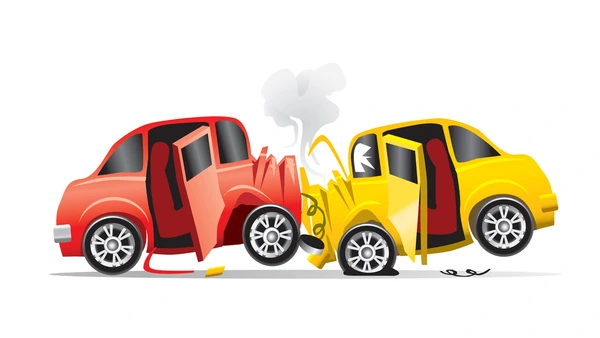

Submitted by:
1.   Megha Arul Senthilkumar
2.   Neeharika Kamireddy
3.   Rajashree Ramaprabu





## **1. Introduction**

### *Problem Definition*
The objective of this project is to develop a machine learning model capable of predicting the severity of driver injuries and the extent of vehicle damage in the aftermath of a collision. The model will take into account various input variables, including collision type, weather conditions, traffic density, light conditions, and the presence of substance abuse. The goal is to analyze the impact of these input features on the respective target variables (Injury Severity and Vehicle Damage Extent) and create a classification model that can effectively assess the severity of a collision (in terms of driver's injury and vehicle damage) based on the given circumstances.

#### *Background:*
In the realm of road safety and accident prevention, the ability to accurately predict the severity of driver injuries and the extent of vehicle damage plays a pivotal role. Understanding the intricate relationship between various factors is essential for developing effective preventive measures. By harnessing the power of machine learning, we aim to create a robust detection model that not only considers the individual impact of these factors but also comprehensively analyzes their combined effect on the severity of driver injuries and the damage sustained by the vehicles involved. This model holds the potential to revolutionize how we approach road safety, providing valuable insights into the circumstances that contribute to different outcomes in collisions.

#### *Challenges:*
The challenges in developing such a detection model are multifaceted. First and foremost, the complexity of real-world collisions introduces a wide array of variables that must be carefully considered. Factors such as unanticipated road conditions, human behaviors and situations, and diverse vehicle types add layers of intricacy to the modeling process. Overcoming these challenges requires a meticulous approach to data preprocessing, feature engineering, and model optimization to ensure the reliability and robustness of the final detection model.

#### *Machine Learning in Action:*
Machine learning comes into play as a powerful tool to discern patterns and relationships within the vast dataset of collision records. Employing classification techniques, such as decision trees, logistic regression, and ensemble methods like random forests, allows us to build a predictive model that learns from historical data. The model leverages the input feature to make informed predictions about the severity of driver injuries and the extent of vehicle damage. By continuously refining its understanding through iterative training, the model adapts to the intricacies of real-world scenarios, making it a dynamic and valuable tool for proactive decision-making in the realm of road safety.

#### *Outcome:*
The anticipated outcome of this machine learning initiative is the creation of a sophisticated detection model capable of accurately predicting driver injury severity and vehicle damage extent in collision scenarios. Beyond its predictive capabilities, the model has the potential to significantly enhance our understanding of the complex factors contributing to various outcomes in road incidents. Stakeholders, including law enforcement agencies and policymakers, could leverage these insights to implement targeted interventions, leading to optimized resource allocation, more efficient emergency response, and improved traffic management. The model's impact extends to areas such as insurance risk assessment, public awareness campaigns, legal considerations, and the development of innovative safety technologies. Ultimately, the deployment of this predictive model stands to contribute comprehensively to the overarching goal of reducing the frequency and severity of road accidents, potentially saving lives and mitigating injuries in the realm of road safety.

#### *Task:*
Predict the driver's injury severity and the extent of vehicle damage, using classification, given a huge data of vehicle crashes and their features.

## **2. Dataset Source and Overview**

### **2.1 Data Source**

This is a dataset from the US government site ([data.gov](https://data.gov))  which contains information about
vehicle crash reporting. Link [here](https://catalog.data.gov/dataset/crash-reporting-drivers-data).

This dataset provides information on motor vehicle traffic collisions. The dataset reports details of all traffic collisions occurring on county and local roadways within Montgomery County, as collected via the Automated Crash Reporting System (ACRS) of the Maryland State Police, and reported by the Montgomery County Police, Gaithersburg Police, Rockville Police, or the Maryland-National Capital Park Police. This dataset shows each collision data recorded and the drivers involved.

### **2.2 Dataset Description**

This dataset contains one table named, Crash_Reporting_Drivers_Data, which consists of 168850 rows and 43 columns.

1.  Report Number: ACRS Report Number assigned to the incident.
2.  Local Case Number: Case number from the local investigating agency for the incident.
3.  Agency Name: Name of the investigating agency
4.  ACRS Report Type: Identifies crash as property, injury or fatal
5.  Crash Date/Time: Date and Time of crash
6.  Route Type: Type of roadway at crash location
7.  Road Name: Name of road
8.  Cross-Street Type: Roadway type for nearest cross-street
9.  Cross-Street Name: Name of nearest cross-street
10. Off-Road Description: Description of location for off-road collisions.
11. Municipality: Jurisdiction for crash location
12. Related Non-Motorist: Type(s) of Non-motorist involved
13. Collision Type: Type of collision
14. Weather: Weather at collision location
15. Surface Condition: Condition of roadway surface
16. Light: Lighting conditions
17. Traffic Control: Signage or traffic control devices
18. Driver Substance Abuse: Substance abuse detected for all drivers involved
19. Non-Motorist Substance Abuse: Substance abuse detected for all non-motorists involved
20. Person ID: Unique identifier for non-motorist
21. Driver at Fault: Whether the driver was at fault
22. Injury Severity: Severity of injury to the driver
23. Circumstance: Circumstance(s) specific to this driver.
24. Driver Distracted By: The reason the driver was distracted
25. Drivers License State: The state the driver’s license was issued
26. Vehicle ID: The unique identifier for the driver’s vehicle.
27. Vehicle Damage Extent: The severity of the vehicle damage
28. Vehicle First Impact Location: Vehicle - Location of vehicle area where first impact occurred on.
29. Vehicle Second Impact Location: Vehicle - Location of vehicle area where second impact occurred on.
30. Vehicle Body Type: The body type of the vehicle
31. Vehicle Movement: The movement of the vehicle at the time of collision
32. Vehicle Continuing Dir: Vehicle Circumstances - Continuation direction of vehicle after collisions
33. Vehicle Going Dir: Vehicle Circumstances - Movement of vehicle before collision
34. Speed Limit: Vehicle Circumstances - Local Area posted speed limit
35. Driverless Vehicle: Vehicle Circumstances - If the vehicle was driverless or not
36. Parked Vehicle: Vehicle - Defines if the vehicle was parked or not at the event.
37. Vehicle Year: The vehicle’s year
38. Vehicle Make: Make of the vehicle
39. Vehicle Model: Model of the vehicle
40. Equipment Problems: Driver - Improper use of safety equipment issues
41. Latitude: Y coordinate of crash location
42. Longitude: X coordinate of crash location
43. Location: Location of crash

## **3. Data Loading and Cleaning**



### **3.1 Import Packages and Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn import set_config
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.feature_selection import RFECV
from scipy.stats import randint, loguniform
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier

### 3.2 **Loading Data**

Mount Google Drive

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
data = pd.read_csv('Crash_Reporting_-_Drivers_Data.csv')
data.head(5)

/var/tmp/ipykernel_6156/1074682724.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Crash_Reporting_-_Drivers_Data.csv')


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3040003N,190026050,Montgomery County Police,Property Damage Crash,05/31/2019 03:00:00 PM,NaN,NaN,NaN,NaN,PARKING LOT OF 3215 SPARTAN RD,...,15,No,No,2004,HONDA,TK,UNKNOWN,39.150044,-77.063089,"(39.15004368, -77.06308884)"
1,EJ78850038,230034791,Gaithersburg Police Depar,Property Damage Crash,07/21/2023 05:59:00 PM,Maryland (State),FREDERICK RD,Unknown,WATKINS MILL RD,NaN,...,40,No,No,2011,GMC,TK,NO MISUSE,39.159264,-77.219025,"(39.1592635, -77.21902483)"
2,MCP2009002G,230034583,Montgomery County Police,Property Damage Crash,07/20/2023 03:10:00 PM,Maryland (State),GEORGIA AVE,Maryland (State),NORBECK RD,NaN,...,35,No,No,2019,FORD,F150,NO MISUSE,39.109535,-77.075806,"(39.10953506, -77.07580619)"
3,MCP3201004C,230035036,Montgomery County Police,Property Damage Crash,07/23/2023 12:10:00 PM,County,CRYSTAL ROCK DR,County,WATERS LANDING DR,NaN,...,40,No,No,2016,KIA,SW,NO MISUSE,39.190149,-77.266766,"(39.19014917, -77.26676583)"
4,MCP23290028,230035152,Montgomery County Police,Property Damage Crash,07/24/2023 06:10:00 AM,County,MONTGOMERY VILLAGE AVE,County,CENTERWAY RD,NaN,...,35,No,No,2016,TOYT,TK,NO MISUSE,39.172558,-77.203745,"(39.17255801, -77.20374546)"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169760 entries, 0 to 169759
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Report Number                   169760 non-null  object 
 1   Local Case Number               169760 non-null  object 
 2   Agency Name                     169760 non-null  object 
 3   ACRS Report Type                169760 non-null  object 
 4   Crash Date/Time                 169760 non-null  object 
 5   Route Type                      152997 non-null  object 
 6   Road Name                       154015 non-null  object 
 7   Cross-Street Type               152964 non-null  object 
 8   Cross-Street Name               154001 non-null  object 
 9   Off-Road Description            15743 non-null   object 
 10  Municipality                    18852 non-null   object 
 11  Related Non-Motorist            5397 non-null    object 
 12  Collision Type  

### **3.3 Data Cleaning**

Removing NULL Values and undesirable columns

In this phase, we conducted a thorough examination of null values within each column and meticulously explored unique values for individual columns to gain a comprehensive understanding of the dataset. Subsequently, we made the decision to eliminate entries with null values, considering the gravity of the prediction model's application in serious cases such as vehicle crashes. Despite the removal of these entries, we still retained a substantial dataset with an estimated row count of around 1 Lakh. Given the critical nature of the model's involvement in addressing vehicle crashes, the decision not to impute values at the moment was intentional. This cautious approach was adopted to ensure that the dataset used for training and evaluation only comprised complete entries, without introducing any potential inaccuracies associated with imputed values. The objective was to maintain the integrity of the data, recognizing the significance of the issue at hand and avoiding any inadvertent manipulation that might compromise the reliability of the model's predictions.

In [ ]:
data.isnull().sum()

Report Number                          0
Local Case Number                      0
Agency Name                            0
ACRS Report Type                       0
Crash Date/Time                        0
Route Type                         16763
Road Name                          15745
Cross-Street Type                  16796
Cross-Street Name                  15759
Off-Road Description              154017
Municipality                      150908
Related Non-Motorist              164363
Collision Type                       574
Weather                            13191
Surface Condition                  19872
Light                               1413
Traffic Control                    25162
Driver Substance Abuse             30920
Non-Motorist Substance Abuse      165492
Person ID                              0
Driver At Fault                        0
Injury Severity                        0
Circumstance                      138989
Driver Distracted By                   0
Drivers License 

In the below code, we opted to remove the columns named Off-Road Description, Municipality, Related Non-Motorist, and Non-Motorist Substance Abuse due to a substantial number of missing values. These columns exhibited null values exceeding 85% in the dataset. The decision to drop these columns was made instead of eliminating rows, as the latter approach would have resulted in the loss of a considerable portion of our dataset. Moreover, considering the high percentage of missing values, retaining these columns would not have added meaningful insights to our model. Therefore, we decided to exclude them to enhance the overall quality and relevance of our dataset for subsequent modeling purposes.

In [ ]:
data.drop(['Off-Road Description','Municipality','Related Non-Motorist','Non-Motorist Substance Abuse'], axis=1, inplace=True)

In [ ]:
data['Route Type'].unique()

array([nan, 'Maryland (State)', 'County', 'US (State)', 'Municipality',
       'Interstate (State)', 'Other Public Roadway', 'Ramp', 'Government',
       'Service Road', 'Unknown'], dtype=object)

In [ ]:
data.dropna(subset=['Route Type'], inplace=True)

In [ ]:
data['Cross-Street Type'].unique()

array(['Unknown', 'Maryland (State)', 'County', 'US (State)',
       'Other Public Roadway', 'Municipality', 'Ramp', 'Government',
       'Interstate (State)', nan, 'Service Road'], dtype=object)

In [ ]:
data.dropna(subset=['Cross-Street Type'], inplace=True)

In [ ]:
data['Collision Type'].unique()

array(['STRAIGHT MOVEMENT ANGLE', 'HEAD ON LEFT TURN',
       'SAME DIR REAR END', 'SINGLE VEHICLE', 'HEAD ON',
       'OPPOSITE DIRECTION SIDESWIPE', 'SAME DIRECTION RIGHT TURN',
       'OTHER', 'ANGLE MEETS LEFT TURN', 'SAME DIRECTION SIDESWIPE',
       'SAME DIR BOTH LEFT TURN', 'ANGLE MEETS RIGHT TURN',
       'SAME DIR REND RIGHT TURN', 'SAME DIRECTION LEFT TURN',
       'ANGLE MEETS LEFT HEAD ON', 'UNKNOWN', 'SAME DIR REND LEFT TURN',
       'OPPOSITE DIR BOTH LEFT TURN', nan], dtype=object)

In [ ]:
data.dropna(subset=['Collision Type'], inplace=True)

In [ ]:
data['Weather'].unique()

array(['CLEAR', 'CLOUDY', 'RAINING', nan, 'UNKNOWN', 'FOGGY', 'OTHER',
       'SNOW', 'BLOWING SNOW', 'WINTRY MIX', 'SEVERE WINDS', 'SLEET',
       'BLOWING SAND, SOIL, DIRT'], dtype=object)

In [ ]:
data.dropna(subset=['Weather'], inplace=True)

In [ ]:
data['Surface Condition'].unique()

array(['DRY', nan, 'WET', 'UNKNOWN', 'WATER(STANDING/MOVING)',
       'MUD, DIRT, GRAVEL', 'ICE', 'SLUSH', 'SNOW', 'OTHER', 'OIL',
       'SAND'], dtype=object)

In [ ]:
data.dropna(subset=['Surface Condition'], inplace=True)

In [ ]:
data['Light'].unique()

array(['DAYLIGHT', 'DUSK', 'DARK -- UNKNOWN LIGHTING', 'DARK LIGHTS ON',
       'DAWN', 'DARK NO LIGHTS', 'UNKNOWN', 'OTHER', nan], dtype=object)

In [ ]:
data.dropna(subset=['Light'], inplace=True)

In [ ]:
data['Traffic Control'].unique()

array(['TRAFFIC SIGNAL', 'NO CONTROLS', 'OTHER', nan, 'STOP SIGN',
       'FLASHING TRAFFIC SIGNAL', 'WARNING SIGN', 'UNKNOWN', 'YIELD SIGN',
       'PERSON', 'SCHOOL ZONE SIGN DEVICE', 'RAILWAY CROSSING DEVICE'],
      dtype=object)

In [ ]:
data.dropna(subset=['Traffic Control'], inplace=True)

In [ ]:
data['Driver Substance Abuse'].unique()

array(['NONE DETECTED', 'ALCOHOL PRESENT', 'UNKNOWN', nan,
       'COMBINED SUBSTANCE PRESENT', 'ALCOHOL CONTRIBUTED',
       'ILLEGAL DRUG CONTRIBUTED', 'MEDICATION PRESENT',
       'MEDICATION CONTRIBUTED', 'ILLEGAL DRUG PRESENT',
       'COMBINATION CONTRIBUTED', 'OTHER'], dtype=object)

In [ ]:
data.dropna(subset=['Driver Substance Abuse'], inplace=True)

In [ ]:
data['Circumstance'].unique()

array([nan, 'ANIMAL, N/A', 'ANIMAL, BACKUP DUE TO NON-RECURRING INCIDENT',
       'N/A, WET', 'BACKUP DUE TO REGULAR CONGESTION, N/A',
       'RAIN, SNOW, WET',
       'SLEET, HAIL, FREEZ. RAIN, TRAFFIC CONTROL DEVICE INOPERATIVE, WET',
       'N/A, ROAD UNDER CONSTRUCTION/MAINTENANCE',
       'DEBRIS OR OBSTRUCTION, RAIN, SNOW, WET',
       'N/A, RUTS, HOLES, BUMPS',
       'N/A, TRAFFIC CONTROL DEVICE INOPERATIVE',
       'V WIPERS|W OTHER ENVIRONMENTAL, WET', 'N/A, RAIN, SNOW',
       'DEBRIS OR OBSTRUCTION, N/A', 'N/A, PHYSICAL OBSTRUCTION(S)',
       'BACKUP DUE TO PRIOR CRASH, N/A', 'N/A, SMOG, SMOKE',
       'SLEET, HAIL, FREEZ. RAIN, WET',
       'N/A, VISION OBSTRUCTION (INCL. BLINDED BY SUN)',
       'RAIN, SNOW, SLEET, HAIL, FREEZ. RAIN, WET',
       'BACKUP DUE TO PRIOR CRASH, RAIN, SNOW, WET',
       'RAIN, SNOW, V EXHAUST SYSTEM|R OTHER ROAD, VISION OBSTRUCTION (INCL. BLINDED BY SUN), WET',
       'BACKUP DUE TO REGULAR CONGESTION, RAIN, SNOW, WET',
       'N/A, SLEET, HA

In [ ]:
data.drop(['Circumstance'], axis=1, inplace=True)

In [ ]:
data['Drivers License State'].unique()

array(['MD', 'CA', nan, 'DC', 'VA', 'NY', 'XX', 'TX', 'NJ', 'GA', 'TN',
       'WA', 'ND', 'MO', 'PA', 'MS', 'NC', 'NM', 'FL', 'UT', 'IN', 'WV',
       'AZ', 'AL', 'MI', 'CT', 'NH', 'IL', 'DE', 'OH', 'NE', 'WI', 'MN',
       'US', 'CO', 'HI', 'NF', 'NV', 'ME', 'LA', 'AB', 'MH', 'AR', 'OK',
       'MB', 'SC', 'ON', 'MA', 'KY', 'OR', 'PR', 'IA', 'ID', 'IT', 'MT',
       'AK', 'RI', 'YT', 'QC', 'VI', 'NL', 'WY', 'KS', 'VT', 'UM', 'NS',
       'BC', 'GU', 'AS'], dtype=object)

In [ ]:
data['Drivers License State'].fillna('unknown', inplace=True)

In [ ]:
data['Drivers License State'].unique()

array(['MD', 'CA', 'unknown', 'DC', 'VA', 'NY', 'XX', 'TX', 'NJ', 'GA',
       'TN', 'WA', 'ND', 'MO', 'PA', 'MS', 'NC', 'NM', 'FL', 'UT', 'IN',
       'WV', 'AZ', 'AL', 'MI', 'CT', 'NH', 'IL', 'DE', 'OH', 'NE', 'WI',
       'MN', 'US', 'CO', 'HI', 'NF', 'NV', 'ME', 'LA', 'AB', 'MH', 'AR',
       'OK', 'MB', 'SC', 'ON', 'MA', 'KY', 'OR', 'PR', 'IA', 'ID', 'IT',
       'MT', 'AK', 'RI', 'YT', 'QC', 'VI', 'NL', 'WY', 'KS', 'VT', 'UM',
       'NS', 'BC', 'GU', 'AS'], dtype=object)

In [ ]:
data.dropna(subset=['Vehicle Damage Extent'], inplace=True)

In [ ]:
data['Vehicle First Impact Location'].unique()

array(['THREE OCLOCK', 'TWELVE OCLOCK', 'SIX OCLOCK', 'FOUR OCLOCK',
       'UNKNOWN', 'NINE OCLOCK', 'ONE OCLOCK', 'TEN OCLOCK',
       'SEVEN OCLOCK', 'ELEVEN OCLOCK', 'EIGHT OCLOCK', 'TWO OCLOCK',
       'FIVE OCLOCK', 'NON-COLLISION', 'ROOF TOP', 'UNDERSIDE', nan],
      dtype=object)

In [ ]:
data.dropna(subset=['Vehicle First Impact Location'], inplace=True)

In [ ]:
data['Vehicle Second Impact Location'].unique()

array(['TWO OCLOCK', 'TWELVE OCLOCK', 'SIX OCLOCK', 'FOUR OCLOCK',
       'FIVE OCLOCK', 'UNKNOWN', 'NINE OCLOCK', 'ONE OCLOCK',
       'TEN OCLOCK', 'SEVEN OCLOCK', 'ELEVEN OCLOCK', 'EIGHT OCLOCK',
       'THREE OCLOCK', 'NON-COLLISION', 'UNDERSIDE', 'ROOF TOP', nan],
      dtype=object)

In [ ]:
data.dropna(subset=['Vehicle Second Impact Location'], inplace=True)

In [ ]:
data['Equipment Problems'].unique()

array(['NO MISUSE', 'UNKNOWN', nan, 'OTHER', 'AIR BAG FAILED',
       'STRAP/TETHER LOOSE', 'NOT STREPPED RIGHT', 'BELTS/ANCHORS BROKE',
       'BELT(S) MISUSED', 'FACING WRONG WAY', 'SIZE/TYPE IMPROPER'],
      dtype=object)

In [ ]:
data.dropna(subset=['Equipment Problems'], inplace=True)

In [ ]:
data['Vehicle Body Type'].unique()

array(['PASSENGER CAR', 'PICKUP TRUCK', '(SPORT) UTILITY VEHICLE',
       'TRANSIT BUS', 'VAN', 'MOTORCYCLE', 'UNKNOWN', 'TRUCK TRACTOR',
       nan, 'POLICE VEHICLE/NON EMERGENCY',
       'MEDIUM/HEAVY TRUCKS 3 AXLES (OVER 10,000LBS (4,536KG))',
       'OTHER LIGHT TRUCKS (10,000LBS (4,536KG) OR LESS)',
       'CARGO VAN/LIGHT TRUCK 2 AXLES (OVER 10,000LBS (4,536 KG))',
       'POLICE VEHICLE/EMERGENCY', 'OTHER BUS', 'MOPED', 'SCHOOL BUS',
       'RECREATIONAL VEHICLE', 'OTHER', 'AMBULANCE/EMERGENCY',
       'AUTOCYCLE', 'STATION WAGON', 'SNOWMOBILE',
       'FIRE VEHICLE/EMERGENCY', 'ALL TERRAIN VEHICLE (ATV)',
       'FIRE VEHICLE/NON EMERGENCY', 'AMBULANCE/NON EMERGENCY',
       'FARM VEHICLE', 'LOW SPEED VEHICLE', 'CROSS COUNTRY BUS',
       'LIMOUSINE'], dtype=object)

In [ ]:
data.dropna(subset=['Vehicle Body Type'], inplace=True)

In [ ]:
data['Vehicle Movement'].unique()

array(['MAKING LEFT TURN', 'ACCELERATING', 'STARTING FROM LANE',
       'STOPPED IN TRAFFIC LANE', 'SLOWING OR STOPPING',
       'MOVING CONSTANT SPEED', 'MAKING RIGHT TURN', 'UNKNOWN',
       'MAKING U TURN', 'CHANGING LANES', 'PASSING', 'PARKING',
       'LEAVING TRAFFIC LANE', 'BACKING', 'NEGOTIATING A CURVE',
       'ENTERING TRAFFIC LANE', 'STARTING FROM PARKED',
       'RIGHT TURN ON RED', 'SKIDDING', nan, 'OTHER', 'PARKED',
       'DRIVERLESS MOVING VEH.'], dtype=object)

In [ ]:
data.dropna(subset=['Vehicle Movement'], inplace=True)

In [ ]:
data['Vehicle Continuing Dir'].unique()

array(['East', 'North', 'West', 'South', 'Unknown', nan], dtype=object)

In [ ]:
data.dropna(subset=['Vehicle Continuing Dir'], inplace=True)

In [ ]:
data['Vehicle Make'].unique()

array(['GMC', 'FORD', 'KIA', ..., 'ICRB', 'INTR', 'GENE'], dtype=object)

In [ ]:
data.dropna(subset=['Vehicle Make'], inplace=True)

In [ ]:
data['Vehicle Model'].unique()

array(['TK', 'F150', 'SW', ..., 'DURANGOQ', 'CORR', 'RENAGADE'],
      dtype=object)

In [ ]:
data.dropna(subset=['Vehicle Model'], inplace=True)

In [ ]:
data['Driver Distracted By'].unique()

array(['NOT DISTRACTED', 'LOOKED BUT DID NOT SEE', 'UNKNOWN',
       'INATTENTIVE OR LOST IN THOUGHT', 'OTHER DISTRACTION',
       'USING OTHER DEVICE CONTROLS INTEGRAL TO VEHICLE',
       'TEXTING FROM A CELLULAR PHONE',
       'DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT',
       'OTHER CELLULAR PHONE RELATED', 'NO DRIVER PRESENT',
       'TALKING OR LISTENING TO CELLULAR PHONE', 'BY OTHER OCCUPANTS',
       'ADJUSTING AUDIO AND OR CLIMATE CONTROLS', 'EATING OR DRINKING',
       'OTHER ELECTRONIC DEVICE (NAVIGATIONAL PALM PILOT)',
       'BY MOVING OBJECT IN VEHICLE',
       'USING DEVICE OBJECT BROUGHT INTO VEHICLE', 'SMOKING RELATED',
       'DIALING CELLULAR PHONE'], dtype=object)

Listing all the columns that are currently available in the dataset.

In [ ]:
data.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Collision Type', 'Weather', 'Surface Condition',
       'Light', 'Traffic Control', 'Driver Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Driver Distracted By',
       'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Second Impact Location',
       'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Continuing Dir',
       'Vehicle Going Dir', 'Speed Limit', 'Driverless Vehicle',
       'Parked Vehicle', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model',
       'Equipment Problems', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

We have loaded the selected set of columns into a new dataset called "data1" in order to avoid any kind of discrepancies in the future.

In [ ]:
selected_columns = [
    'Crash Date/Time', 'Route Type', 'Cross-Street Type', 'Collision Type',
    'Weather', 'Surface Condition', 'Light', 'Traffic Control',
    'Driver Substance Abuse', 'Driver At Fault', 'Driver Distracted By',
    'Drivers License State', 'Vehicle First Impact Location',
    'Vehicle Second Impact Location', 'Vehicle Body Type', 'Vehicle Movement',
    'Vehicle Continuing Dir', 'Vehicle Going Dir', 'Speed Limit',
    'Equipment Problems', 'Injury Severity', 'Vehicle Damage Extent', 'Longitude', 'Latitude'
]
data1 = data[selected_columns]

When we were examining the values in the 'Crash Date/Time' column, we recognized that the values in this column encompass the entire datetime stamp, resulting in the difficult usage of the values in the column, in technical terms. Consequently, we made the decision to decode this datetime stamp into distinct components such as year and month, aiming to gain a more detailed comprehension of the datetime values. Subsequently, as the 'Crash Date/Time' column had been deconstructed into various components, we opted to drop it from the dataset. Additionally, we chose to exclude the 'Minutes' and 'Seconds' columns, deeming their inclusion as features less pertinent for the predictive modeling process. This decision was taken in order to streamline and optimize the dataset for more effective model training and interpretation.

In [ ]:
data1['Crash Date/Time']=pd.to_datetime(data1['Crash Date/Time'])

/var/tmp/ipykernel_6156/2797296375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Crash Date/Time']=pd.to_datetime(data1['Crash Date/Time'])


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86483 entries, 1 to 169758
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Crash Date/Time                 86483 non-null  datetime64[ns]
 1   Route Type                      86483 non-null  object        
 2   Cross-Street Type               86483 non-null  object        
 3   Collision Type                  86483 non-null  object        
 4   Weather                         86483 non-null  object        
 5   Surface Condition               86483 non-null  object        
 6   Light                           86483 non-null  object        
 7   Traffic Control                 86483 non-null  object        
 8   Driver Substance Abuse          86483 non-null  object        
 9   Driver At Fault                 86483 non-null  object        
 10  Driver Distracted By            86483 non-null  object        
 11  Driver

In [ ]:
data1.loc[:, 'Crash Date/Time'] = pd.to_datetime(data1['Crash Date/Time'], format='%m/%d/%Y %I:%M:%S %p')

data1.loc[:, 'Year'] = data1['Crash Date/Time'].dt.year
data1.loc[:, 'Month'] = data1['Crash Date/Time'].dt.month
data1.loc[:, 'Day'] = data1['Crash Date/Time'].dt.day
data1.loc[:, 'Hour'] = data1['Crash Date/Time'].dt.hour
data1.loc[:, 'Minute'] = data1['Crash Date/Time'].dt.minute
data1.loc[:, 'Second'] = data1['Crash Date/Time'].dt.second
data1.loc[:, 'AM/PM'] = data1['Crash Date/Time'].dt.strftime('%p')


/var/tmp/ipykernel_6156/2139270624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.loc[:, 'Year'] = data1['Crash Date/Time'].dt.year
/var/tmp/ipykernel_6156/2139270624.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.loc[:, 'Month'] = data1['Crash Date/Time'].dt.month
/var/tmp/ipykernel_6156/2139270624.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86483 entries, 1 to 169758
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Crash Date/Time                 86483 non-null  datetime64[ns]
 1   Route Type                      86483 non-null  object        
 2   Cross-Street Type               86483 non-null  object        
 3   Collision Type                  86483 non-null  object        
 4   Weather                         86483 non-null  object        
 5   Surface Condition               86483 non-null  object        
 6   Light                           86483 non-null  object        
 7   Traffic Control                 86483 non-null  object        
 8   Driver Substance Abuse          86483 non-null  object        
 9   Driver At Fault                 86483 non-null  object        
 10  Driver Distracted By            86483 non-null  object        
 11  Driver

In [ ]:
data1 = data1.drop(columns=['Crash Date/Time','Minute','Second'])

Let's take a look at the top few rows from the newly constructed dataset.

In [ ]:
data1.head(5)

We will now review the variable types in the new dataset, data1 and check if there are any more null values present in it.

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86483 entries, 1 to 169758
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Crash Date/Time                 86483 non-null  object 
 1   Route Type                      86483 non-null  object 
 2   Cross-Street Type               86483 non-null  object 
 3   Collision Type                  86483 non-null  object 
 4   Weather                         86483 non-null  object 
 5   Surface Condition               86483 non-null  object 
 6   Light                           86483 non-null  object 
 7   Traffic Control                 86483 non-null  object 
 8   Driver Substance Abuse          86483 non-null  object 
 9   Driver At Fault                 86483 non-null  object 
 10  Driver Distracted By            86483 non-null  object 
 11  Drivers License State           86483 non-null  object 
 12  Vehicle First Impact Location   8648

In [ ]:
data1.isnull().sum()

Crash Date/Time                   0
Route Type                        0
Cross-Street Type                 0
Collision Type                    0
Weather                           0
Surface Condition                 0
Light                             0
Traffic Control                   0
Driver Substance Abuse            0
Driver At Fault                   0
Driver Distracted By              0
Drivers License State             0
Vehicle First Impact Location     0
Vehicle Second Impact Location    0
Vehicle Body Type                 0
Vehicle Movement                  0
Vehicle Continuing Dir            0
Vehicle Going Dir                 0
Speed Limit                       0
Equipment Problems                0
Injury Severity                   0
Vehicle Damage Extent             0
Longitude                         0
Latitude                          0
dtype: int64

### **3.4 Data Visualization**

Presented here are visualizations that have provided insights into the interrelationships among various columns in the dataset. These visual representations have been instrumental in enhancing our understanding of how different attributes within the dataset correlate and interact.

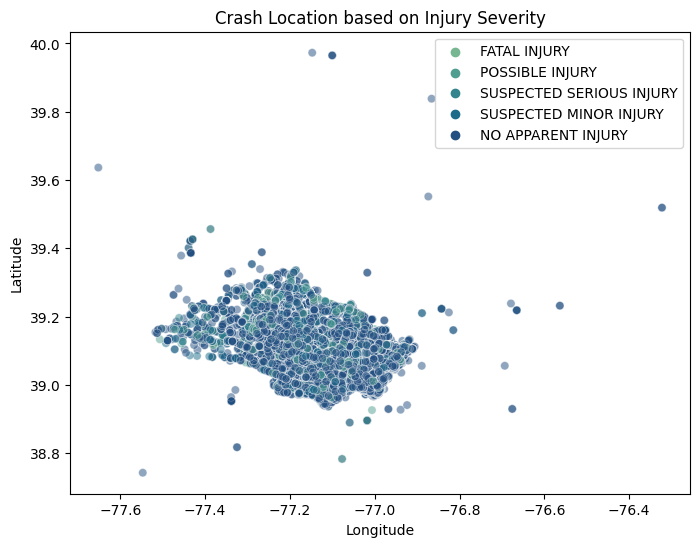

In [ ]:
#Create a scatter plot to visualize the geographic distribution of crashes based on injury severity.
plt.figure(figsize=(8, 6))
hue_order = ['FATAL INJURY', 'POSSIBLE INJURY', 'SUSPECTED SERIOUS INJURY', 'SUSPECTED MINOR INJURY', 'NO APPARENT INJURY']
sns.scatterplot(data=data1, x='Longitude', y='Latitude', hue='Injury Severity', hue_order=hue_order,
                sizes=(1, 100), alpha=0.5, palette='crest')
plt.title('Crash Location based on Injury Severity')
plt.legend(scatterpoints=1)
plt.show()

The scatterplot above provides a geographical representation of crash locations, offering valuable insights into the correlation between injury severity and the geographic coordinates (longitude and latitude) of each incident.

The hue variation in the scatterplot reflects different levels of injury severity, allowing for a visual categorization of crash incidents. Brighter hues signify higher injury severity, while darker hues indicate less severe outcomes. This color-coded approach enhances the interpretability of the spatial distribution of crashes and the associated injury severity.

Since the dataset contains data of only maryland, the scatter plots for are concentrated in one area.

By combining geographic information with injury severity data, this visualization serves as a powerful tool for stakeholders involved in traffic safety analysis and policymaking. It facilitates the identification of hotspots or areas prone to more severe accidents, aiding in the development of targeted strategies for accident prevention and response. The scatterplot is a visually intuitive way to comprehend the complex interplay between location, injury severity, and crash density in the context of road safety.

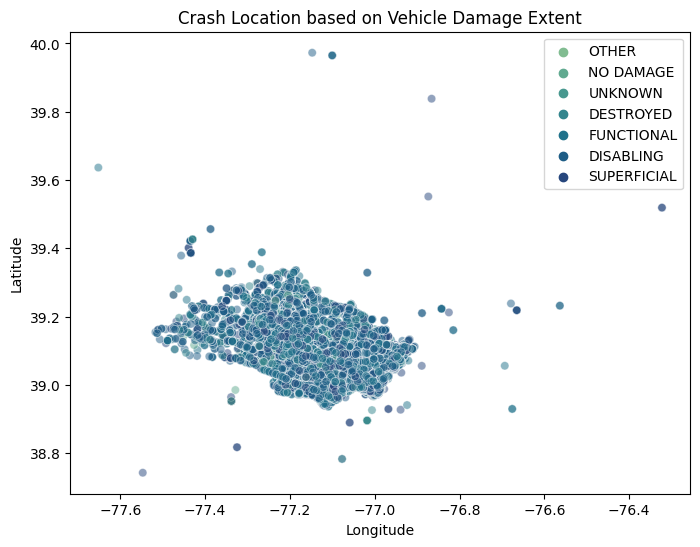

In [ ]:
# Create a scatter plot to visualize the geographic distribution of crashes based on the extent of vehicle damage
plt.figure(figsize=(8, 6))
hue_order=['OTHER', 'NO DAMAGE', 'UNKNOWN', 'DESTROYED', 'FUNCTIONAL', 'DISABLING', 'SUPERFICIAL']
sns.scatterplot(data=data1, x='Longitude', y='Latitude', hue='Vehicle Damage Extent', hue_order=hue_order,
                sizes=(1, 100), alpha=0.5, palette='crest')
plt.title('Crash Location based on Vehicle Damage Extent')
plt.legend(scatterpoints=1)
plt.show()

The scatterplot above provides a geographical representation of crash locations, offering insights into the correlation between the extent of vehicle damage and the geographic coordinates (longitude and latitude) of each incident. The color-coded approach enhances the interpretability of the spatial distribution of crashes and the associated vehicle damage.

Since the dataset contains data of only maryland, the scatter plots for are concentrated in one area.

By combining geographic information with vehicle damage extent data, this visualization serves as a powerful tool for stakeholders involved in traffic safety analysis and policymaking. It facilitates the identification of hotspots or areas prone to more severe vehicle damage, aiding in the development of targeted strategies for accident prevention and response. The scatterplot is a visually intuitive way to comprehend the complex interplay between location, vehicle damage extent, and crash density in the context of road safety.

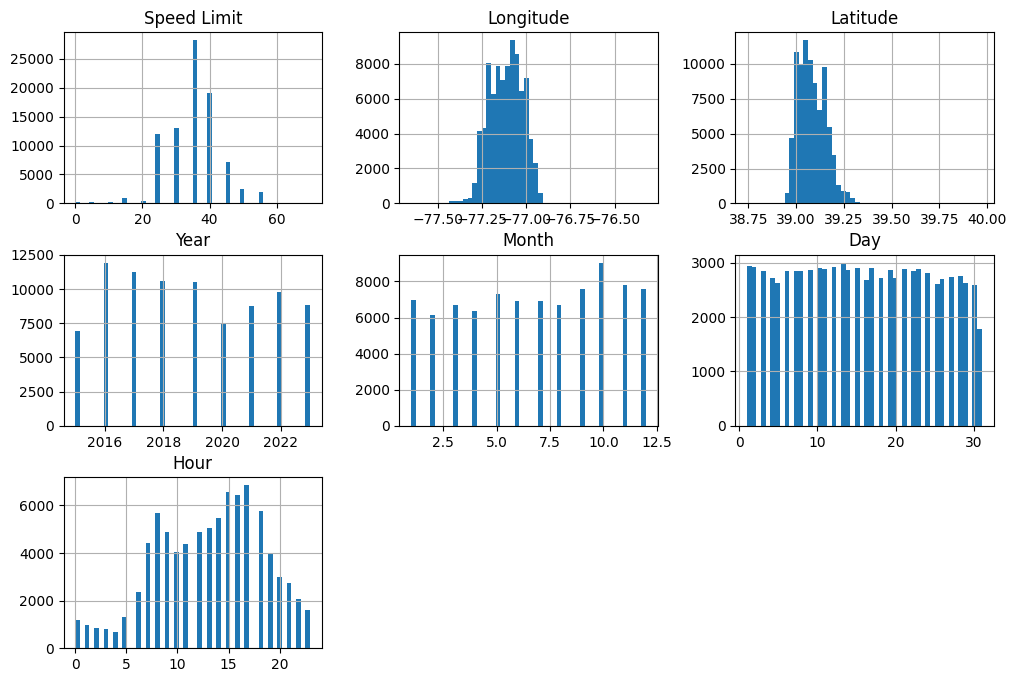

In [ ]:
# Generate histograms for each numerical column in the 'data1' DataFrame with 50 bins and a figure size of 12 by 8.
data1.hist(bins=50, figsize=(12, 8))
plt.show()

The histograms above offer a comprehensive perspective on the distribution patterns of numerical variables within the dataset. Each histogram visually represents the dispersion of values across various ranges. Notably, some graphs exhibit a normal distribution, while others showcase a more dispersed pattern. Collectively, these histograms provide a clear overview of the count distribution for each numerical variable, offering valuable insights into the dataset's characteristics and highlighting variations in the distribution of values across different features.

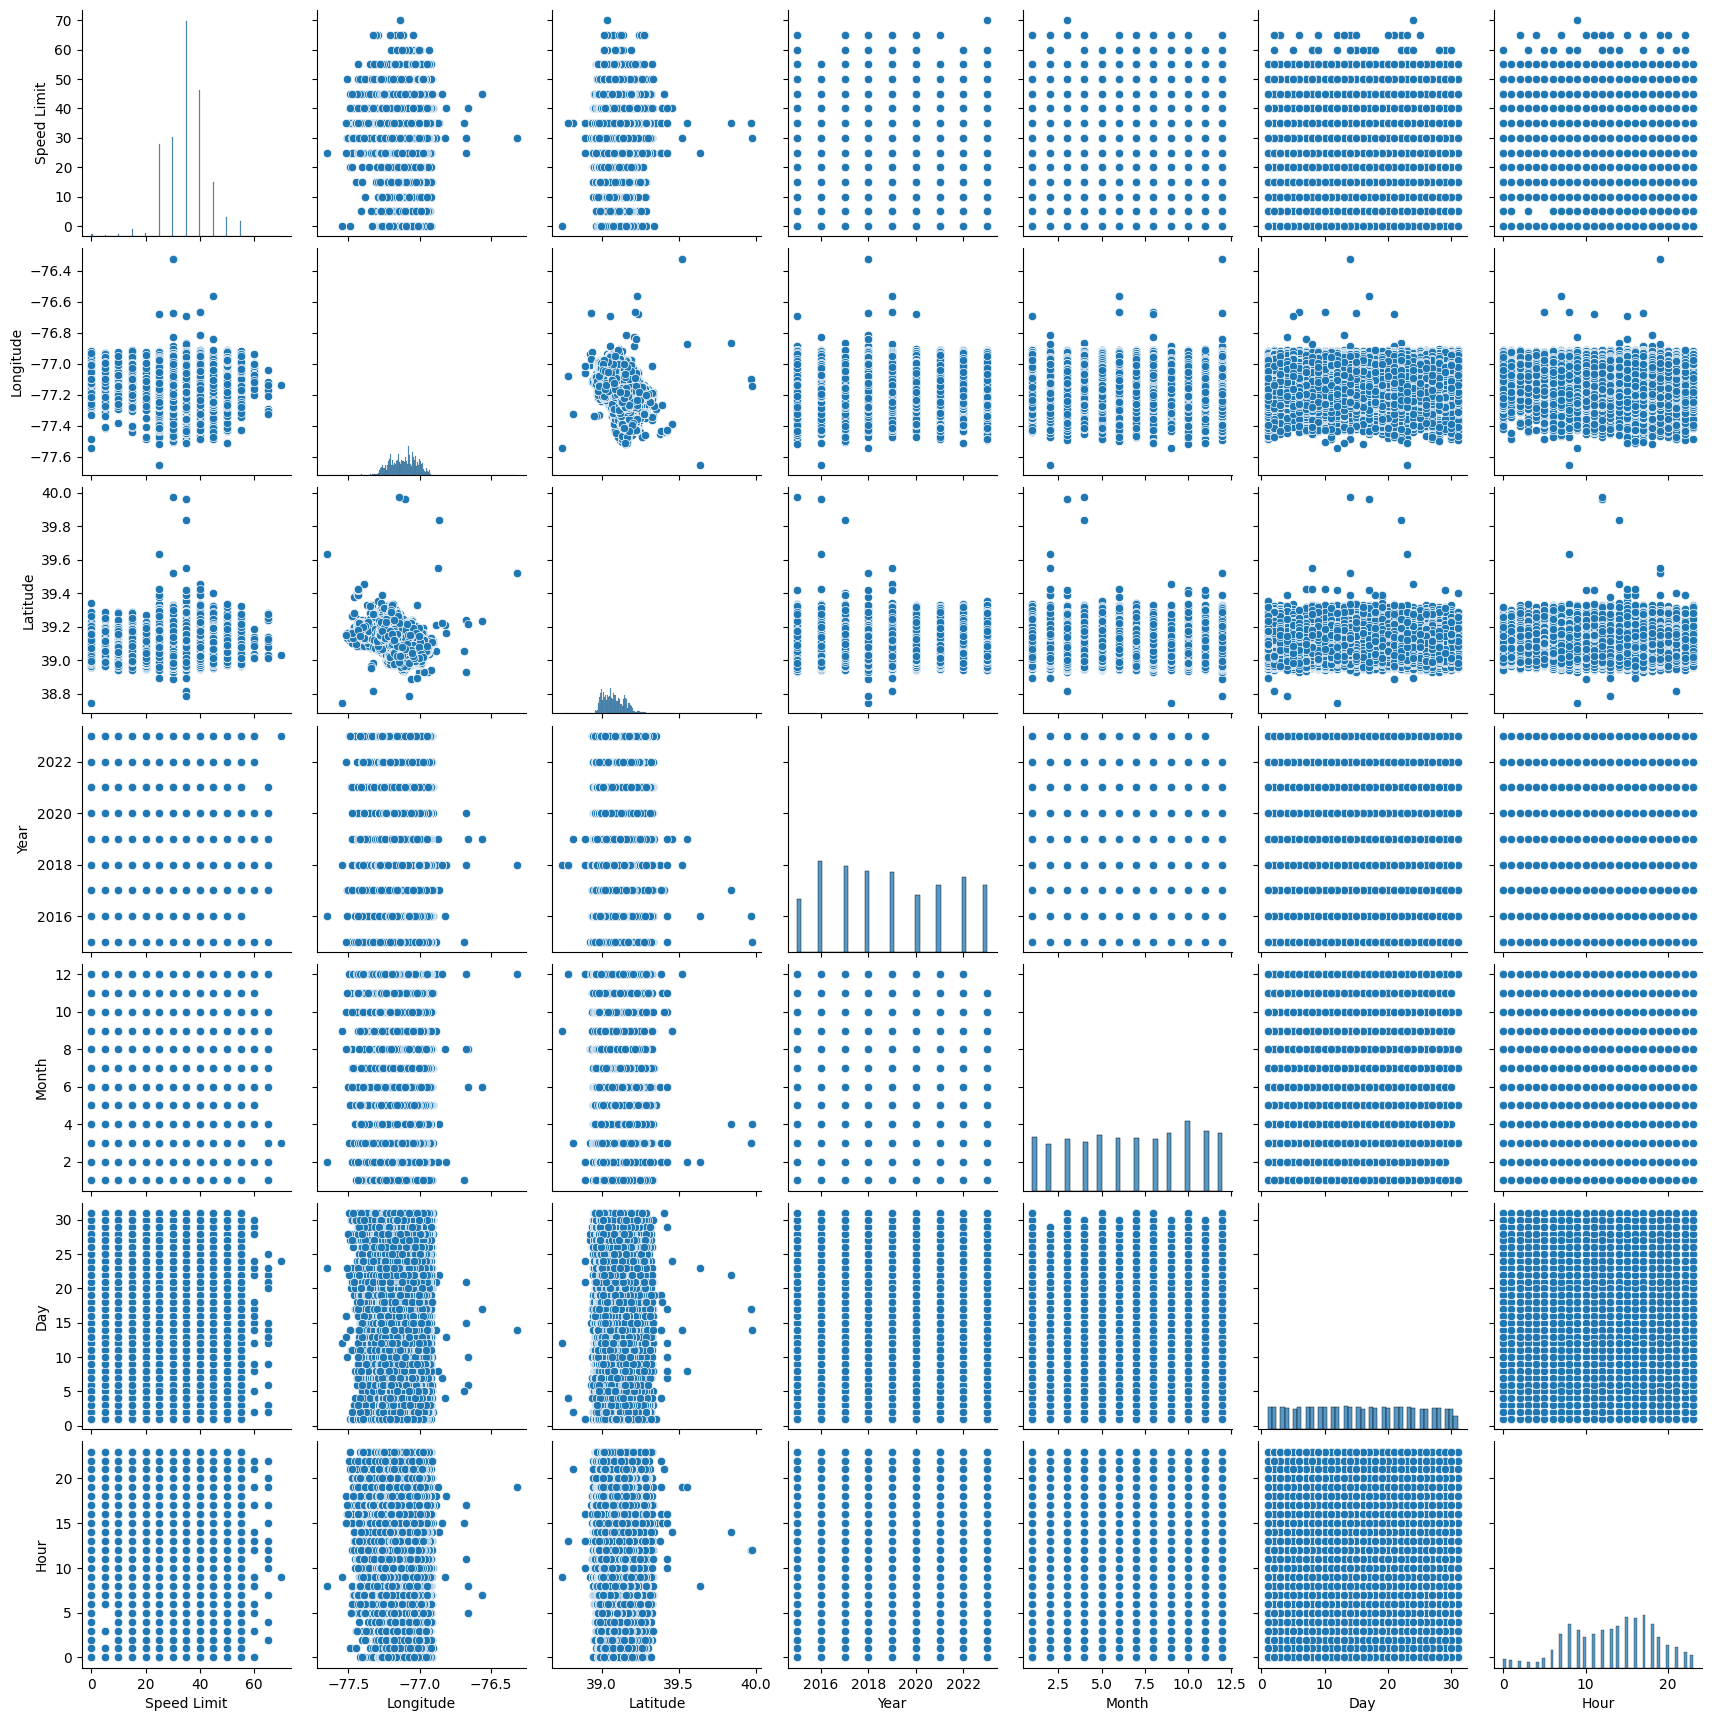

In [ ]:
sns.pairplot(data1);

The pairplot illustrates the relationships among numerical variables, aiding in the identification of increased associations between them. This is valuable for discerning the influence one variable may have on another, offering insights crucial for enhancing our machine learning model.

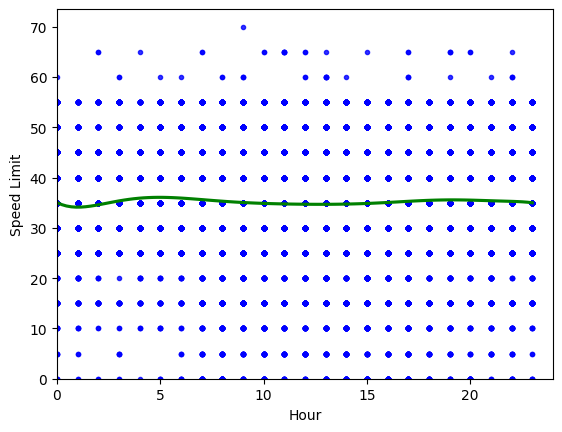

In [ ]:
# Scatter plot with a polynomial regression line depicting the relationship between 'Speed Limit' and 'Hour'.
sns.regplot(x=data1['Hour'], y=data1['Speed Limit'], order=10, color='green', ci=None, scatter_kws={'color':'blue', 's':9})
plt.xlim(0,24)
plt.ylim(ymin=0);

The presented plot illustrates the relationship between speed limits and the hour of the day. Notably, the speed limit appears relatively consistent with minor fluctuations, particularly around noon. From this analysis, it can be inferred that accidents attributed to speed limits exhibit limited correlation with the hour of the day when solely considering these two variables. However, it's essential to recognize that this relationship may evolve when additional variables are introduced into the analysis.

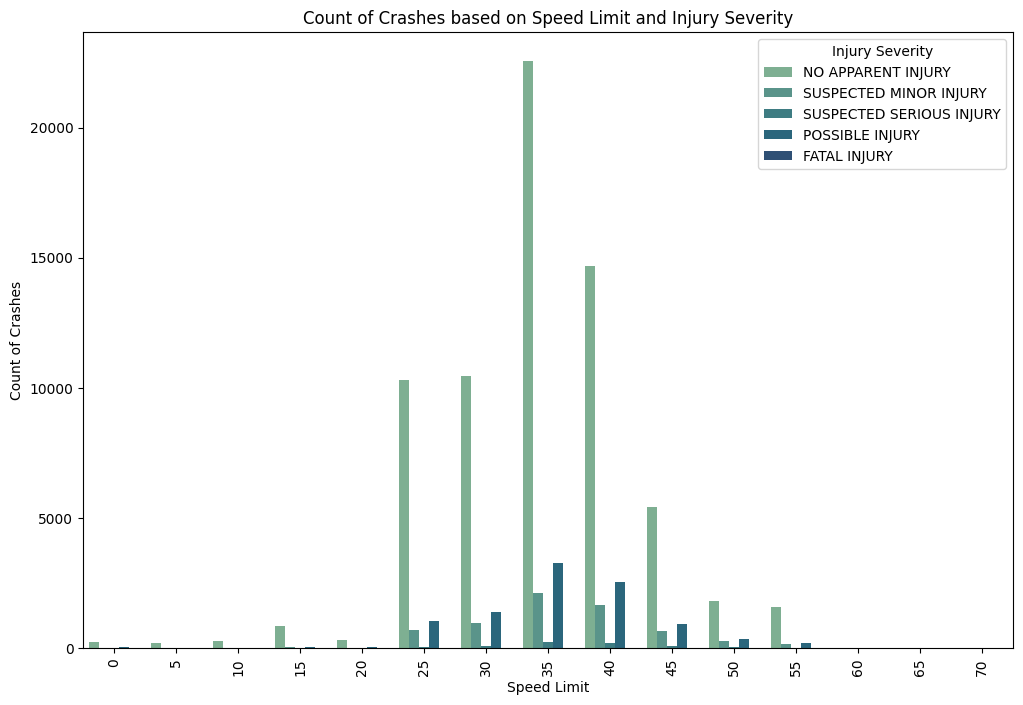

In [ ]:
# Create a countplot to visualize the distribution of crashes based on 'Speed Limit' and 'Injury Severity'.
plt.figure(figsize=(12, 8))
sns.countplot(data=data1, x='Speed Limit', hue='Injury Severity', palette='crest')
plt.ylabel('Count of Crashes')
plt.title('Count of Crashes based on Speed Limit and Injury Severity')
plt.xticks(rotation=90);

The depicted graphs showcase the overall count of crashes corresponding to each speed limit. Notably, the highest count is observed at a speed limit of approximately 33. This insightful representation offers a comprehensive view of the distribution of crashes across different speed limits, highlighting the specific speed limit where the occurrence of crashes is most prevalent.

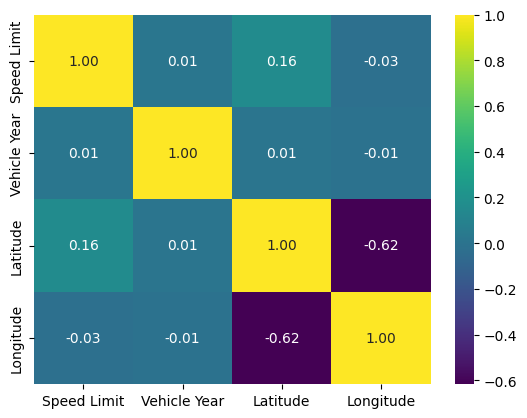

In [ ]:
# Generate a heatmap to visualize the correlation matrix of numerical variables in the dataset.
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis');

This heatmap effectively visualizes the correlation among numeric variables within the dataset. The color spectrum and numerical values depicted in each cell offer a clear indication of the degree of relevance between different variables and how they mutually influence one another.

## **4. Machine Learning Techniques**

### **4.1 Split the Data**

In the below code snippet, we are preparing our dataset for training and testing by separating features (X) from the target variables for injury severity (y1) and vehicle damage extent (y2).

In [ ]:
# Splitting the dataset into features (X) and target variables for injury severity (y1) and vehicle damage extent (y2).
X = data1.drop(["Injury Severity", "Vehicle Damage Extent"], axis=1)
y1 = data1["Injury Severity"].copy()
y2 = data1["Vehicle Damage Extent"].copy()
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(
    X, y1, y2, test_size=0.25, random_state=3)

We are separating the features (independent variables) and target variables ("Injury Severity" and "Vehicle Damage Extent") from the data1 DataFrame. The train_test_split function from the scikit-learn library is then used to randomly split the data into training and testing sets for both target variables, allocating 25% of the data for testing and maintaining reproducibility with a specified random seed of 3. The resulting variables (X_train, X_test, y1_train, y1_test, y2_train, y2_test) are further utilized for training and evaluating machine learning models.

### **4.2 Create a Pipeline**

In the below code, a preprocessing pipeline is established to handle numerical and categorical features independently. For numerical features, it involves imputing missing values using the median and scaling features using StandardScaler. For categorical features, missing values are imputed with the most frequent values, and one-hot encoding is applied. The overall preprocessing is encapsulated in a ColumnTransformer, allowing for a streamlined transformation of the dataset. The preprocessing steps are applied separately to training and testing sets (X_train and X_test). The use of an imputer, even after removing null values in your dataset, is a practice aimed at ensuring the robustness and generalization ability of your machine learning model. In a real-world scenario, the machine learning model may be deployed to make predictions on new, incoming data in real-time. The imputer ensures that your model can handle missing values in real-time predictions, maintaining its accuracy and reliability.

In [ ]:
# Creating a preprocessing pipeline to handle numerical and categorical features separately.
set_config(display='diagram') # Shows the pipeline graphically when printed

#Calling the categorical and numerical variables to cat_attribs and num_attribs respectively
cat_attribs = ['Route Type', 'Cross-Street Type', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control',
               'Driver Substance Abuse', 'Driver At Fault', 'Driver Distracted By',
               'Drivers License State', 'Vehicle First Impact Location',
               'Vehicle Second Impact Location', 'Vehicle Body Type',
               'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
               'Speed Limit', 'Equipment Problems', 'AM/PM', 'Year', 'Month',
               'Day', 'Hour']

num_attribs = ['Longitude', 'Latitude']

# Numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_encoder', OneHotEncoder(sparse_output=False))
])

# Full preprocessing pipeline
prep_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
], verbose_feature_names_out=False)
prep_pipeline.set_output(transform='pandas')

# We apply the preprocessing as a separate step and work with the transformed data
X_train_prepd = prep_pipeline.fit_transform(X_train)

# preprocess the X_test as well
X_test_prepd = prep_pipeline.transform(X_test)
prep_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Longitude', 'Latitude']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['Route Type', 'Cross-Street Type',
                                  'Collision Type', 'Weather',
                                  'Surface...n', 'Light',
                                  'Traffic Control', 'Driver Substance Abuse',
                                  'Driver At Fault', 'Driver Distracted By',
                                  'Drivers License State',
                                  'Vehicle First Impact Location',
                                  'Vehicle Second Impact Location',
                                  'Vehicle Body Type', 'Vehicle Movement',
                                  'Vehicle Continuing Dir', 'Vehicle Going Dir',
                                  'Speed Limit', 'Equipment Problems', 'AM/PM',
                                  'Year', 'Month', 'Day', 'Hour'])],
                  verbose_feature_names_out=False)

We are setting up a preprocessing pipeline for our dataset, we are handling both numerical and categorical features in the pipeline. The set_config(display='diagram') line configures the display option to show the pipeline graphically when printed. The features are divided into two groups: num_attribs for numerical features and cat_attribs for categorical features. We are constructing two separate pipelines for numerical and categorical data, applying imputation for missing values and scaling for numerical features, and imputation and one-hot encoding for categorical features. These pipelines are combined using a ColumnTransformer to create an overall preprocessing pipeline (prep_pipeline). This pipeline is then applied to transform both the training (X_train) and testing (X_test) datasets. The result is a transformed dataset that can be further used for training and evaluating our predictive model, with numerical features imputed and scaled, and categorical features imputed and one-hot encoded. The graphical representation of the pipeline is presented in order to visualize the preprocessing steps.

The below code snippet aims to compare unique values in categorical columns between the training and test sets. It iterates through each categorical attribute, identifying and printing any new categories introduced in the test set that were not present in the training set. This step was done for ensuring consistency and compatibility between the two sets during model evaluation as few splits did not take each category in each split.

In [ ]:
# Examine unique values in categorical columns for training set
unique_values_train = {}
for col in cat_attribs:
    unique_values_train[col] = set(X_train[col].unique())

# Examine unique values in categorical columns for test set
unique_values_test = {}
for col in cat_attribs:
    unique_values_test[col] = set(X_test[col].unique())

# Print the unique values for each categorical column
for col in cat_attribs:
    new_categories_in_test = unique_values_test[col] - unique_values_train[col]
    if new_categories_in_test:
        print(f"New categories in '{col}' for test set: {new_categories_in_test}")

With the above code, we are examining and comparing unique categorical values between the training set (`X_train`) and the test set (`X_test`). The process iterates through the specified categorical columns (`cat_attribs`) and creates dictionaries (`unique_values_train` and `unique_values_test`) that store the unique values for each column in the training and test sets, respectively. We are then printing any new categories found in the test set that are not present in the training set for each categorical column. This process helps to identify and alert users to any unforeseen categories in the test set, ensuring consistency in categorical values between training and testing data, which is crucial for accurate our prediction model.

In [ ]:
# Displaying the shapes of training and testing sets for features and target variables.
X_train.shape, X_test.shape, y1_train.shape, y1_test.shape,y2_train.shape,y2_test.shape

((64862, 26), (21621, 26), (64862,), (21621,), (64862,), (21621,))

Checking and printing the shapes of the training, testing features and training and testing of the two prediction tasks present in our model.

In [ ]:
# Comparing the number of columns obtained from 'get_feature_names_out()' with the actual number of columns in the transformed training set.
print("Number of columns from get_feature_names_out():", len(prep_pipeline.get_feature_names_out()))
print("Number of columns in X_train_transformed:", X_train_prepd.shape[1])

Number of columns from get_feature_names_out(): 378
Number of columns in X_train_transformed: 378


We are printing the number of columns in the transformed training data after applying a preprocessing pipeline. The first line uses the get_feature_names_out() method from the pipeline (prep_pipeline) to obtain the names of the transformed features and then prints the count of the feature names. The second line prints the number of columns directly from the shape of the transformed training data (X_train_prepd). Comparing these two counts helps ensure consistency and correctness in the preprocessing steps, confirming that the expected number of features is obtained after applying the pipeline to the training data.

We can view the tranformed columns below

In [ ]:
# Displaying the column names obtained from 'get_feature_names_out()' method in the preprocessing pipeline.
print("Column names from get_feature_names_out():", prep_pipeline.get_feature_names_out())

Column names from get_feature_names_out(): ['Longitude' 'Latitude' 'Route Type_County' 'Route Type_Government'
 'Route Type_Interstate (State)' 'Route Type_Maryland (State)'
 'Route Type_Municipality' 'Route Type_Other Public Roadway'
 'Route Type_Ramp' 'Route Type_Service Road' 'Route Type_US (State)'
 'Route Type_Unknown' 'Cross-Street Type_County'
 'Cross-Street Type_Government' 'Cross-Street Type_Interstate (State)'
 'Cross-Street Type_Maryland (State)' 'Cross-Street Type_Municipality'
 'Cross-Street Type_Other Public Roadway' 'Cross-Street Type_Ramp'
 'Cross-Street Type_Service Road' 'Cross-Street Type_US (State)'
 'Cross-Street Type_Unknown' 'Collision Type_ANGLE MEETS LEFT HEAD ON'
 'Collision Type_ANGLE MEETS LEFT TURN'
 'Collision Type_ANGLE MEETS RIGHT TURN' 'Collision Type_HEAD ON'
 'Collision Type_HEAD ON LEFT TURN'
 'Collision Type_OPPOSITE DIR BOTH LEFT TURN'
 'Collision Type_OPPOSITE DIRECTION SIDESWIPE' 'Collision Type_OTHER'
 'Collision Type_SAME DIR BOTH LEFT TURN'
 '

We are using the get_feature_names_out() method from the pipeline (prep_pipeline) to return the list of column names corresponding to the transformed features. The code helps us to visualize the feature importances of our model. Feature importances represent the contribution of each feature in making predictions. We are sorting the features based on their importance, and then selecting a subset of it to display in a bar chart using Matplotlib. The x-axis represents the feature importance scores, and the y-axis displays the names of the corresponding features. This visualization provides a clear understanding of which features have the most significant impact on the model's predictions, aiding in feature selection, interpretation, and model evaluation.

The next step that we followed was to analyse and decide whether we wanted to build one model for both the output variables or two different ones for each variable

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(data1["Injury Severity"], data1["Vehicle Damage Extent"])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 9080.499465747742
P-value: 0.0


In this code, a contingency table is created using the pd.crosstab function to examine the relationship between 'Injury Severity' and 'Vehicle Damage Extent'. The chi-square statistic of 9080.50 and a p-value of 0.0 indicate a highly significant association between the variables 'Injury Severity' and 'Vehicle Damage Extent.' In statistical terms, a low p-value (approaching zero) suggests strong evidence against the null hypothesis, which posits that the variables are independent. Therefore, we reject the null hypothesis and conclude that there is a significant relationship between the severity of injuries and the extent of vehicle damage in the dataset

In [ ]:
# Calculate Cramér's V
num_obs = np.sum(contingency_table)
cramers_v = np.sqrt(chi2 / (num_obs * (min(contingency_table.shape) - 1)))
print(f"Cramér's V: {cramers_v}")

Cramér's V: Vehicle Damage Extent
DESTROYED      0.726677
DISABLING      0.253077
FUNCTIONAL     0.312938
NO DAMAGE      0.954445
OTHER          7.629438
SUPERFICIAL    0.345051
UNKNOWN        1.075935
dtype: float64


Cramér's V is a measure of association between categorical variables, and the values provided for each category of 'Vehicle Damage Extent' suggest the strength of association with 'Injury Severity. These statistical measures help determine the strength and significance of the relationship between the two variables.We can observe that there is high association between few classes while there is less for others even the when seen as whole the two variables showed a high association. Due to this ambiguity, we chose to handle the two output varibales seperately.

### **4.3 Machine Learning Models**

#### **4.3.1 For y1 Prediction - Injury Severity**

Initially, our approach involved experimenting with various models on the dataset, with the intention of selecting the most suitable one based on performance metrics. However, several models yielded similar results, prompting us to delve into hyperparameter tuning and feature selection. The goal was to refine and enhance the models, enabling us to make a more informed decision on the optimal choice. Given the gravity of the situation underlying the dataset, it became imperative to construct the best possible model. Below, we outline each model's tuning process and, ultimately, the criteria used to select the superior model among them.

##### *Logistic Regression Model*

In [ ]:
model_y1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100)
model_y1.fit(X_train_prepd, y1_train)

y1_pred = model_y1.predict(X_train_prepd)

balanced_accuracy_y1 = balanced_accuracy_score(y1_train, y1_pred)

# Precision is computed using the average parameter
precision_y1 = precision_score(y1_train, y1_pred, average='weighted')

# Cross-validation scores
cv_score_y1 = cross_val_score(model_y1, X_train_prepd, y1_train, cv=5, scoring='accuracy')

print(f"Accuracy (Injury Severity): {accuracy_score(y1_train, y1_pred)}")
print(f"Balanced Accuracy (Injury Severity): {balanced_accuracy_y1}")
print(f"Precision (Injury Severity): {precision_y1}")
print(f"Cross-Validation Accuracy (Injury Severity): {cv_score_y1.mean()}")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy (Injury Severity): 0.8007461996238168
Balanced Accuracy (Injury Severity): 0.2789701548246751
Precision (Injury Severity): 0.707686552156298
Cross-Validation Accuracy (Injury Severity): 0.8001757605676383


We are training a Logistic Regression model on the preprocessed training data (X_train_prepd) to predict the target variable "Injury Severity" (y1_train). The trained model's predictions on the training data are stored in y1_pred. It creates a Logistic Regression model (model_y1) with specified parameters for multiclass classification (multi_class='multinomial'), solver (solver='lbfgs'), and maximum number of iterations (max_iter=100). Performance metrics such as accuracy, balanced accuracy, precision, and cross-validation accuracy are then computed and printed. The balance accuracy function calculates the balanced accuracy score for the two arguments, the true labels (y1_train) and the predicted labels (y1_pred). The precision score takes three arguments: the true labels (y1_train), the predicted labels (y1_pred), and the average parameter. We are using "weighted" for average parameter which helps in calculating the average precision with respect to the number of instances in each class. This will result higher weight to classes with fewer instances, making it useful for an imbalanced dataset. The cross_val_score function performs cross-validation, evaluating the model's performance on different subsets of the training data. We are using a 5-fold cross-validation (cv=5) and calculating the accuracy (scoring='accuracy').

Analysis:


Accuracy (Injury Severity): 0.8007
The accuracy score of 0.8007 indicates that approximately 80.07% of the predictions made by the logistic regression model on the training data are correct. It gives an overall measure of the model's correctness.
Balanced Accuracy (Injury Severity): 0.2790

The balanced accuracy score of 0.2790
This takes into account the imbalances in the distribution of classes. A low balanced accuracy suggests that the model might struggle with classes that are underrepresented in the dataset.
Precision (Injury Severity): 0.7077

The precision score of 0.7077
This reflects the model's ability to correctly identify instances of each class, taking into account the weighted average. This indicates that, on average, 70.77% of the instances predicted as positive are indeed positive.

Cross-Validation Accuracy (Injury Severity): 0.8002
The cross-validation accuracy score of 0.8002 provides an estimate of the model's generalization performance. It suggests that the model performs consistently well across different subsets of the training data.

Over All Analysis:


The over all fit of the model to the data is good but it might struggle on imbalanced distribution of classes. Further, we can notice that there were many errors thrown during the process which might show that the model is not able to properly fit the data,


###### Feature Importance for the logistic regression model

The below code snippet prints the coefficients and intercepts of the logistic regression model trained to predict 'Injury Severity.' The coefficients represent the weight assigned to each feature for each class, while the intercept provides the model's baseline. Understanding these values is essential for interpreting the contribution of each feature to the prediction of different classes of injury severity.

In [ ]:
# Displaying coefficients and intercepts of the logistic regression model for 'Injury Severity.'
print("Coefficients:")
for i, class_coef in enumerate(model_y1.coef_):
    print(f"Class {i} Coefficients:")
    for j, coef in enumerate(class_coef):
        print(f"    Feature {j}: {coef}")

# Print intercept
print("Intercept:")
for i, intercept in enumerate(model_y1.intercept_):
    print(f"Class {i} Intercept: {intercept}")

Coefficients:
Class 0 Coefficients:
    Feature 0: -0.04830223593954226
    Feature 1: 0.056387440381744106
    Feature 2: -0.1358363816489309
    Feature 3: -0.019795747258649448
    Feature 4: -0.07928466145362692
    Feature 5: 0.13838223025513732
    Feature 6: -0.14769145167065661
    Feature 7: -0.037208535074596275
    Feature 8: -0.021784117316238843
    Feature 9: -0.0009354618717800556
    Feature 10: -0.18320002853521905
    Feature 11: -0.00021369957835091512
    Feature 12: -0.09806253488493788
    Feature 13: 0.04943661162405069
    Feature 14: -0.016398319402408077
    Feature 15: -0.30047291572833706
    Feature 16: -0.12240072750527196
    Feature 17: -0.12284574246946073
    Feature 18: 0.10370102166336648
    Feature 19: -0.0038755584295150597
    Feature 20: -0.03871715769363085
    Feature 21: 0.06206746867323235
    Feature 22: 0.07865485464056442
    Feature 23: -0.06662914767690283
    Feature 24: -0.028154049231550498
    Feature 25: 0.16511696022205072
    Fea

We are printing the co efficients and intercepts of our model. We are iterating through each class and each feature's coefficient within that class. It prints the coefficients for each feature in each class, providing insight into the weight assigned to each feature for predicting each class.

##### *Decision tree Model*

Firstly, we built a decision tree model for the Y1

In [ ]:
# Train Decision Tree for "Injury Severity" (y1)
tree_model_y1 = DecisionTreeClassifier()
tree_model_y1.fit(X_train_prepd, y1_train)

# Make predictions for both targets on the training set
tree_y1_pred = tree_model_y1.predict(X_train_prepd)

# Calculate balanced accuracy
tree_balanced_accuracy_y1 = balanced_accuracy_score(y1_train, tree_y1_pred)

# Precision is computed using the average parameter
tree_precision_y1 = precision_score(y1_train, tree_y1_pred, average='weighted')

# Cross-validation scores
tree_cv_score_y1 = cross_val_score(tree_model_y1, X_train_prepd, y1_train, cv=5, scoring='accuracy')

print(f"Decision Tree Accuracy (Injury Severity): {accuracy_score(y1_train, tree_y1_pred)}")
print(f"Decision Tree Balanced Accuracy (Injury Severity): {tree_balanced_accuracy_y1}")
print(f"Decision Tree Precision (Injury Severity): {tree_precision_y1}")
print(f"Decision Tree Cross-Validation Accuracy (Injury Severity): {tree_cv_score_y1.mean()}")

Decision Tree Accuracy (Injury Severity): 0.9965619314853073
Decision Tree Balanced Accuracy (Injury Severity): 0.9904342890387774
Decision Tree Precision (Injury Severity): 0.9965676124824486
Decision Tree Cross-Validation Accuracy (Injury Severity): 0.6797817255549543


We are now training the Decision Tree Classifier on the preprocessed training data (X_train_prepd) to predict the target variable "Injury Severity" (y1_train). The trained model's predictions on the training data are stored in tree_y1_pred. Performance metrics such as accuracy, balanced accuracy, precision, and cross-validated accuracy, are computed and printed. The balance accuracy function calculates the balanced accuracy score for the two arguments, the true labels (y1_train) and the predicted labels (y1_pred). The precision score takes three arguments: the true labels (y1_train), the predicted labels (y1_pred), and the average parameter. We are using "weighted" for average parameter which helps in calculating the average precision with respect to the number of instances in each class. This will result higher weight to classes with fewer instances, making it useful for an imbalanced dataset. The cross_val_score function performs cross-validation, evaluating the model's performance on different subsets of the training data. We are using a 5-fold cross-validation (cv=5) and calculating the accuracy (scoring='accuracy'). These metrics helps in evaluating the Decision Tree Classifier's performance in predicting "Injury Severity," considering both accuracy and its ability to handle imbalanced classes. The results are printed to assess the model's effectiveness and generalization performance.

The performance metrics for the Decision Tree model in the context of injury severity analysis are as follows:

Decision Tree Accuracy (Injury Severity): 0.9966

The accuracy score of 0.9966 indicates that approximately 99.66% of the predictions made by the Decision Tree model on the dataset are correct. This suggests a very high accuracy.
Decision Tree Balanced Accuracy (Injury Severity): 0.9904

The balanced accuracy score of 0.9904 takes into account the imbalances in the distribution of classes. A high balanced accuracy suggests that the Decision Tree model is effective across different classes of injury severity.
Decision Tree Precision (Injury Severity): 0.9966

The precision score of 0.9966 reflects the model's ability to correctly identify instances of each class. This high precision indicates that, on average, 99.66% of the instances predicted as positive are indeed positive.
Decision Tree Cross-Validation Accuracy (Injury Severity): 0.6798

The cross-validation accuracy score of 0.6798 provides an estimate of the Decision Tree model's generalization performance using cross-validation. This score represents the average accuracy across different subsets of the training data.

Analysis:

The Decision Tree model achieves high accuracy and balanced accuracy on the training data, indicating that it fits the training set very well. The high precision suggests that the model is very selective in identifying instances of each class, with a focus on minimizing false positives. However, the relatively lower cross-validation accuracy score may indicate a potential issue of overfitting, where the model may not generalize as well to unseen data. This is usually the problem with decisions trees but it can be improved with parameter tuning and feature selection.

To get a better understanding of how decision trees split classes, we ran an initial decision tree with just max_depth=2.

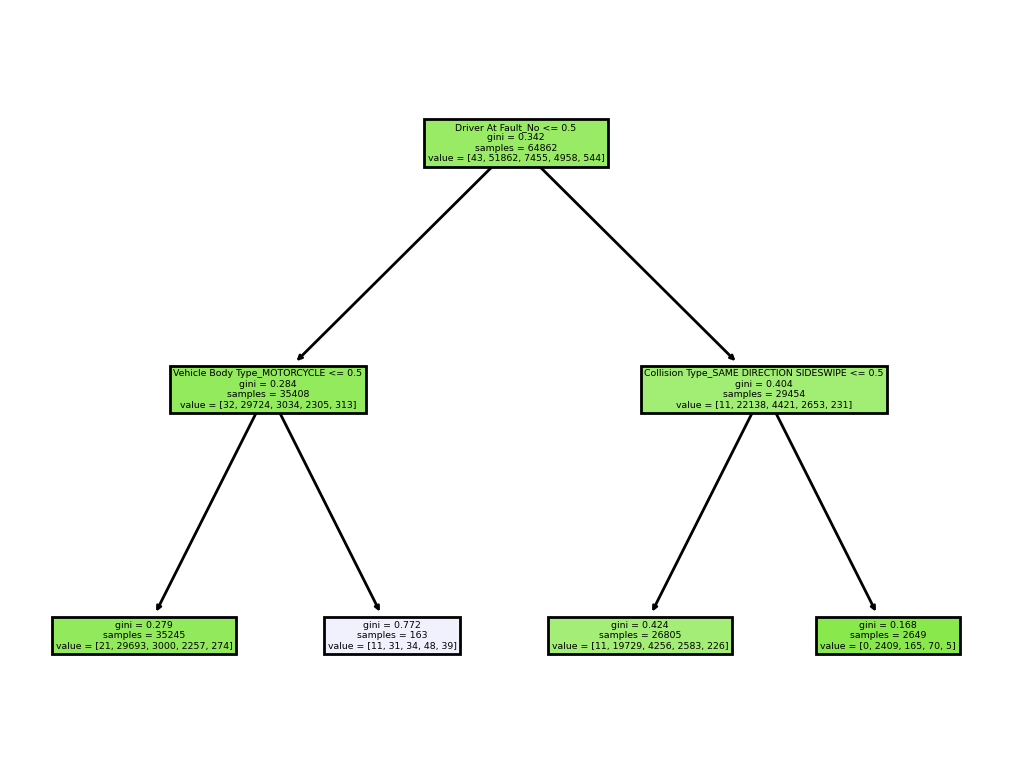

In [ ]:
# Training a Decision Tree Classifier for 'Injury Severity' and visualizing the decision tree structure.
clf = DecisionTreeClassifier(max_depth=2)

clf.fit(X_train_prepd, y1_train)

#For making the figure a little larger and easier to read
plt.figure(dpi=200)

#Graphic Representation of the tree
plot_tree(clf, filled=True, feature_names=list(X_train_prepd.columns));

From the above decision tree, we can observe the important features that have high relevance and have been used as a criteria to split the classes.The Gini index for a node measures the impurity of the set of labels (target classes) present in that node. We can see how many values are present in each class in each node.

In the below code snippet, the feature importances are obtained from a trained Decision Tree Classifier for 'Injury Severity' and are used to select the top 10 features. A new Decision Tree Classifier is then trained on these selected features, and its performance is evaluated using various metrics:

We are using a for loop function to iterate through the different alpha values obtained from the cost-complexity pruning path (ccp_alphas) and trains Decision Tree Classifiers (clf_i) for each alpha. Firstly initializing the Decision Tree Classifier (clf_i) with a specified random seed (random_state=0) for reproducibility and a given alpha value (ccp_alpha), it is trained on the preprocessed training data (X_train_prepd) and corresponding labels (y1_train). The training process involves recursively splitting nodes to create a tree structure based on the features and labels. The trained Decision Tree Classifier (clf_i) is added to a list (clfs). This list will store multiple classifiers, each corresponding to a different alpha value from the cost-complexity pruning path. The clf_i.tree_.node_count attribute retrieves the total number of nodes in the tree, including both internal and leaf nodes.The clf_i.tree_.max_depth attribute provides the depth of the deepest leaf node in the tree, indicating how many levels of splits the tree has undergone. For each classifier, the number of nodes and the maximum depth of the tree are recorded. The results of node_counts and depth are then plotted against the alpha values using Matplotlib, creating two subplots for each.

In [ ]:
# Get feature importances from the trained Decision Tree
feature_importances = tree_model_y1.feature_importances_

# Select top k features based on importance
k = 10  # Choose an appropriate value for k
top_k_indices = feature_importances.argsort()[-k:][::-1]
X_train_selected = X_train_prepd.iloc[:, top_k_indices]

# Train Decision Tree on the selected features
tree_model_selected = DecisionTreeClassifier()
tree_model_selected.fit(X_train_selected, y1_train)

# Make predictions for both targets on the training set using the selected features
tree_selected_y1_pred = tree_model_selected.predict(X_train_selected)

# Calculate metrics for the model with selected features
tree_selected_balanced_accuracy_y1 = balanced_accuracy_score(y1_train, tree_selected_y1_pred)
tree_selected_precision_y1 = precision_score(y1_train, tree_selected_y1_pred, average='weighted')
tree_selected_cv_score_y1 = cross_val_score(tree_model_selected, X_train_selected, y1_train, cv=5, scoring='accuracy')

# Print metrics for the model with selected features
print(f"Decision Tree Accuracy (Injury Severity) with Selected Features: {accuracy_score(y1_train, tree_selected_y1_pred)}")
print(f"Decision Tree Balanced Accuracy (Injury Severity) with Selected Features: {tree_selected_balanced_accuracy_y1}")
print(f"Decision Tree Precision (Injury Severity) with Selected Features: {tree_selected_precision_y1}")
print(f"Decision Tree Cross-Validation Accuracy (Injury Severity) with Selected Features: {tree_selected_cv_score_y1.mean()}")

Decision Tree Accuracy (Injury Severity) with Selected Features: 0.986602324936018
Decision Tree Balanced Accuracy (Injury Severity) with Selected Features: 0.9594398151526485
Decision Tree Precision (Injury Severity) with Selected Features: 0.9866952210663105
Decision Tree Cross-Validation Accuracy (Injury Severity) with Selected Features: 0.6684807572186917


We are performing feature selection and evaluating the performance of a Decision Tree model on a dataset (X_train_prepd, y1_train) with the selected features. This will help us in extracting the feature importances from a previously trained Decision Tree model (tree_model_y1). We are selecting the top k features based on their importance scores. The argsort function sorts the indices of features in ascending order of importance, and then [-k:][::-1] is used to select the indices of the top k features in descending order. The dataset (X_train_selected) is then updated to include only these top feature and then a new Decision Tree model (tree_model_selected) is trained using only the selected features. The model is used to make predictions on the training set with the selected features, and various performance metrics such as balanced accuracy, precision, and cross-validation accuracy are calculated for evaluation. We are then printing  the evaluation metrics for the Decision Tree model trained with the selected features, providing insights into its performance on the training set.

Analysis:
The Decision Tree model trained on the selected top-k features exhibits impressive performance metrics for predicting 'Injury Severity' on the training set:

Accuracy: Achieving an accuracy of approximately 98.7% suggests the model correctly predicts the injury severity category for the majority of instances.

Balanced Accuracy: A balanced accuracy of around 95.9% indicates the model's ability to handle imbalanced class distribution, considering each class's sensitivity.

Precision: The precision score of about 98.7% implies a high level of correctness in predicting each class, considering their respective weights.

Cross-Validation Accuracy: The cross-validation accuracy of approximately 66.8% indicates robustness, though it is notably lower than the training accuracy. This discrepancy might be attributed to potential overfitting or the limited generalization of the selected features to unseen data.

When comparing the Decision Tree model performance with and without feature selection:

Accuracy:

Original Decision Tree Accuracy: 99.7%
Decision Tree with Selected Features Accuracy: 98.7%
The original Decision Tree model without feature selection achieves a slightly higher accuracy on the training set compared to the model trained on the selected features.

Balanced Accuracy:

Original Decision Tree Balanced Accuracy: 99.0%
Decision Tree with Selected Features Balanced Accuracy: 95.9%
The original Decision Tree model also outperforms the model with selected features in terms of balanced accuracy, indicating better handling of imbalanced class distribution.

Precision:

Original Decision Tree Precision: 99.7%
Decision Tree with Selected Features Precision: 98.7%
The original Decision Tree model demonstrates a marginally higher precision score compared to the model with selected features.

Cross-Validation Accuracy:

Original Decision Tree Cross-Validation Accuracy: 67.98%
Decision Tree with Selected Features Cross-Validation Accuracy: 66.8%
Both models exhibit similar cross-validation accuracy, with the original Decision Tree model only slightly surpassing the model with selected features.

In summary, the original Decision Tree model, while having a higher accuracy and balanced accuracy, shows better performance to the model with selected features. But, Feature selection has better potential generalization to unseen data which is also an important consideration.

In [ ]:
# Displaying the top 10 selected features based on importance for 'Injury Severity' prediction.
top_k_features = X_train_prepd.columns[top_k_indices]
print("Top 10 Selected Features:")
for feature in top_k_features:
    print(feature)

Top 10 Selected Features:
Latitude
Longitude
Driver At Fault_No
Year_2017
Vehicle Going Dir_South
Speed Limit_35
Speed Limit_40
Collision Type_SAME DIRECTION SIDESWIPE
Traffic Control_TRAFFIC SIGNAL
Cross-Street Type_County


We are now printing the names of the top 10 selected features based on their importance scores in the previous feature selection process. The names of the features are retrieved from the original dataset (X_train_prepd) The top selected features names are printed iteratively.

This code snippet obtains the cost-complexity pruning path for the Decision Tree model for predicting 'Injury Severity.' The plot illustrates the relationship between the alpha values (complexity parameter) and the total impurity, providing insights into the pruning process.

There are 5502 alpha values.


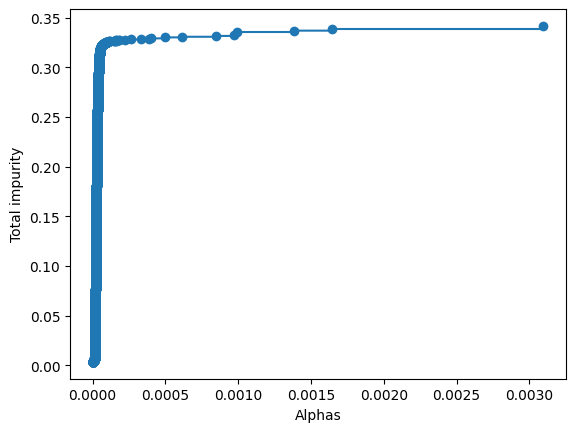

In [ ]:
# Get cost-complexity pruning path for the tree before feature selection
clf_full = DecisionTreeClassifier()
path = clf_full.cost_complexity_pruning_path(X_train_prepd, y1_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.plot(ccp_alphas, impurities, marker='o', drawstyle='steps-post')
plt.xlabel('Alphas'); plt.ylabel('Total impurity');

print(f'There are {ccp_alphas.shape[0]} alpha values.')

We are using Decision Tree Classifier (clf_full) to explore the cost-complexity pruning path. The cost_complexity_pruning_path method is applied to the preprocessed training data (X_train_prepd) and corresponding labels (y1_train). This function is used to return the alphas and their corresponding total impurity, with impurity measured using the default Gini criterion. The code then plots these alpha values against their associated total impurity using Matplotlib, illustrating the trade-off between model complexity and impurity. The resulting plot showcases a stepwise pattern as alpha increases, indicating the pruning path. The print statement provides information about the number of alpha values considered.

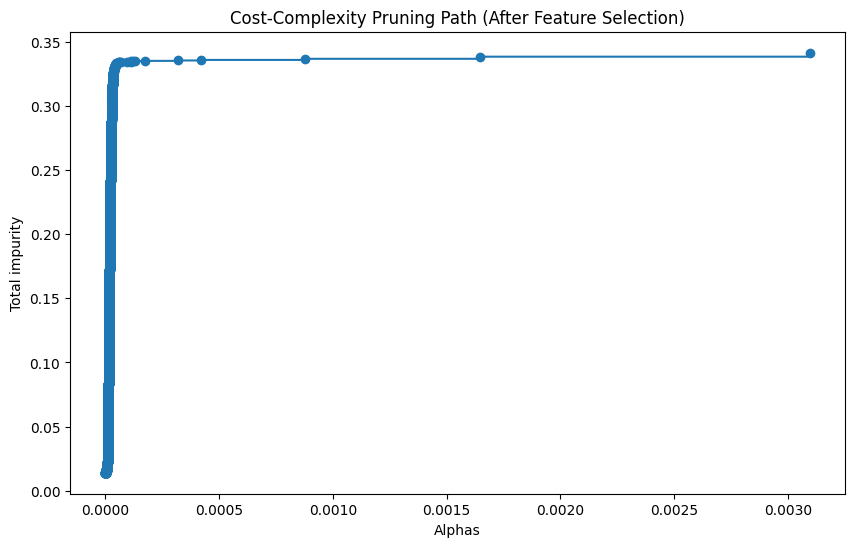

There are 6859 alpha values after feature selection.


In [ ]:
# Get cost-complexity pruning path for the tree after feature selection
path_selected = tree_model_y1.cost_complexity_pruning_path(X_train_selected, y1_train)
ccp_alphas_selected, impurities_selected = path_selected.ccp_alphas, path_selected.impurities

# Plot the cost-complexity pruning path
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas_selected, impurities_selected, marker='o', drawstyle='steps-post')
plt.xlabel('Alphas')
plt.ylabel('Total impurity')
plt.title('Cost-Complexity Pruning Path (After Feature Selection)')
plt.show()

print(f'There are {ccp_alphas_selected.shape[0]} alpha values after feature selection.')

Now, after feature selection, we are performing the cost-complexity pruning on a Decision Tree model (tree_model_y1). We are doing this calculation using the training data with the selected features (X_train_selected, y1_train). The result is a set of alpha values (ccp_alphas_selected) and corresponding total impurity values (impurities_selected) at each step of pruning. We are then plotting the cost-complexity pruning path, showing how total impurity changes with different alpha values. Finally, the total number of alpha values obtained from the cost-complexity pruning path is printed.

The large number of alpha values suggests a comprehensive exploration of the trade-off between complexity and impurity. Selecting an appropriate alpha value from this path is a critical step in achieving a well-pruned Decision Tree model that generalizes effectively to unseen data

In [ ]:
# Using existing ccp_alpha
param_dist = {'ccp_alpha': ccp_alphas}

# Creating RandomizedSearchCV
random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_dist, cv=5, scoring='accuracy', n_iter=50)

# Model Fitting
random_search.fit(X_train_prepd, y1_train)

random_cv_res = pd.DataFrame(random_search.cv_results_)
random_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
display(random_cv_res.filter(regex='(^param_|mean_test_score)', axis=1).head())

# Best model information
best_tree_random = random_search.best_estimator_
print(f'The total number of nodes is {best_tree_random.tree_.node_count} and the max depth is {best_tree_random.tree_.max_depth}.')

,param_ccp_alpha,mean_test_score
2,0.00006,0.794918
14,0.000051,0.785699
43,0.000049,0.781444
21,0.00004,0.759674
34,0.000037,0.749499


The total number of nodes is 185 and the max depth is 18.


 We are importing RandomizedSearchCV class from scikit-learn, to perform hyperparameter tuning, and the uniform distribution from SciPy to define the search space for the hyperparameter. The search space for hyperparameters is defined using the cost-complexity pruning alpha values (ccp_alphas) obtained from the earlier cost-complexity pruning path. We are creating a RandomizedSearchCV object. The defined search space is taken from param_dist and we are defining 5-fold cross-validation (cv=5), and accuracy as the scoring metric (scoring='accuracy'), in this model 100 iterations (n_iter=100) of random search will be performed.

Test accuracy was 80.16%.


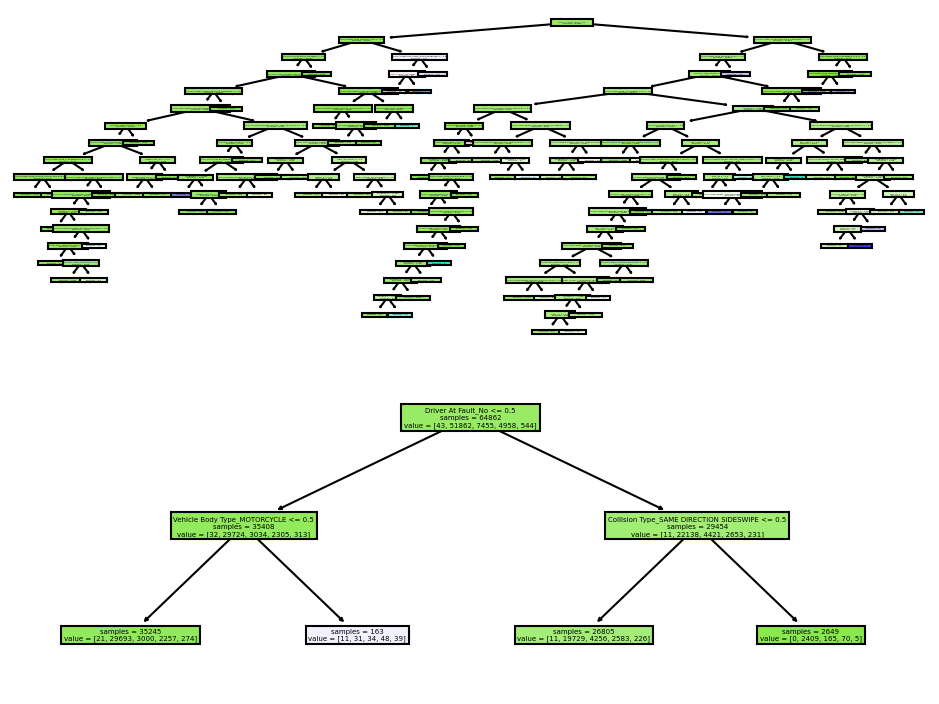

In [ ]:
fig, ax = plt.subplots(2, 1, dpi=150)
plot_tree(best_tree_random, filled=True, feature_names=list(X_train_prepd.columns), impurity=False, ax=ax[0]) # opt
plot_tree(clf, filled=True, feature_names=list(X_train_prepd.columns), impurity=False, ax=ax[1]) # initial
fig.tight_layout()

print(f'Test accuracy was {accuracy_score(y1_train, best_tree_random.predict(X_train_prepd)):2.2%}.')

We are generating two subplots using Matplotlib to visually compare the structure of two Decision Trees: the best-tuned tree obtained from Randomized Search Cross-Validation (best_tree_random) and the initial Decision Tree before hyperparameter tuning (clf). The first subplot (ax[0]) will display the graphical representation of the best-tuned Decision Tree (best_tree_random). The filled=True parameter colors the tree nodes based on the majority class, and feature_names will display the feature names on the tree plot. The impurity=False parameter omits impurity information. Similarly, the second subplot (ax[1]) displays the graphical representation of the initial Decision Tree before hyperparameter tuning (clf). We are using tight_layout() function to ensure there is no overlap in the display. Finally, we are calculating the test accuracy of the best-tuned Decision Tree (best_tree_random) on the test set (X_test_prepd, y_test) using the accuracy_score function and printing the result.

In [ ]:
best_tree_train_pred = best_tree_random.predict(X_train_prepd)
train_accuracy_best_tree = accuracy_score(y1_train, best_tree_train_pred)
train_balanced_accuracy_best_tree = balanced_accuracy_score(y1_train, best_tree_train_pred)
train_precision_best_tree = precision_score(y1_train, best_tree_train_pred, average='weighted')
train_cv_score_best_tree = cross_val_score(best_tree_random, X_train_prepd, y1_train, cv=5, scoring='accuracy').mean()

print(f'Training accuracy for the optimized Decision Tree: {train_accuracy_best_tree:2.2%}')
print(f'Training balanced accuracy for the optimized Decision Tree: {train_balanced_accuracy_best_tree:2.2%}')
print(f'Training precision for the optimized Decision Tree: {train_precision_best_tree:2.2%}')
print(f'Training cross-validation accuracy for the optimized Decision Tree: {train_cv_score_best_tree:2.2%}')

##### *Random Forest*

In [ ]:
# Train Random Forest for "Injury Severity" (y1)
rf_model_y1 = RandomForestClassifier()
rf_model_y1.fit(X_train_prepd, y1_train)

# Make predictions for "Injury Severity" on the training set
rf_y1_pred = rf_model_y1.predict(X_train_prepd)

# Calculate balanced accuracy
rf_balanced_accuracy_y1 = balanced_accuracy_score(y1_train, rf_y1_pred)

# Precision is computed using the average parameter
rf_precision_y1 = precision_score(y1_train, rf_y1_pred, average='weighted')

# Cross-validation scores
rf_cv_score_y1 = cross_val_score(rf_model_y1, X_train_prepd, y1_train, cv=5, scoring='accuracy')

print(f"Random Forest Accuracy (Injury Severity): {accuracy_score(y1_train, rf_y1_pred)}")
print(f"Random Forest Balanced Accuracy (Injury Severity): {rf_balanced_accuracy_y1}")
print(f"Random Forest Precision (Injury Severity): {rf_precision_y1}")
print(f"Random Forest Cross-Validation Accuracy (Injury Severity): {rf_cv_score_y1.mean()}")

Random Forest Accuracy (Injury Severity): 0.9965156794425087
Random Forest Balanced Accuracy (Injury Severity): 0.9920181015985806
Random Forest Precision (Injury Severity): 0.9965147264091107
Random Forest Cross-Validation Accuracy (Injury Severity): 0.797940240408701


We are training the Random Forest classifier (rf_model_y1) on the dataset X_train_prepd, y1_train to predict the "Injury Severity" target variable. The model is fitted using the default hyper parameters then we are using the Random Forest model to make predictions on the same dataset it was trained on. In the next step, we are calculating the various evaluation metrics, including balanced accuracy, precision (weighted average), and cross-validation accuracy, to assess the performance of the Random Forest model on the training set and finally printing the metrics.

In [ ]:
# Define the hyperparameter search space for Random Forest
param_grid_rf = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(2, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None],
}

# RandomizedSearchCV for Random Forest
rand_search_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    n_iter=1,  # You may adjust the number of iterations based on your computational resources
    scoring='accuracy',
    random_state=42
)

# Fit the RandomizedSearchCV for Random Forest
rand_search_rf.fit(X_train_prepd, y1_train)

rand_cv_res_rf = pd.DataFrame(rand_search_rf.cv_results_)
rand_cv_res_rf.sort_values(by="mean_test_score", ascending=False, inplace=True)
rand_cv_res_rf.filter(regex='(^param_|mean_test_score)', axis=1).head()

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_test_score
0,8,sqrt,15,12,121,0.799574


Using RandomizedSearchCV, we are performing hyper paramater tuning. We are defining the search space for hyperparameters using a dictionary (param_grid_rf). For each hyperparameter, a range or a list of possible values are specified. The hyperparameters include the number of trees (n_estimators), maximum depth of trees (max_depth), minimum samples required to split an internal node (min_samples_split), minimum samples required in a leaf node (min_samples_leaf), and the maximum number of features considered for splitting a node (max_features). An instance of RandomizedSearchCV is created that specifies the Random Forest classifier, the hyperparameter search space, the number of cross-validation folds (cv), and the number of iterations (n_iter) for random search, the accuracy, and the random seed for reproducibility. It is then fitted into the training data X_train_prepd, y1_train. The random search will explore different combinations of hyperparameters within the defined search space. A new dataframe rand_cv_res_rf is created to store and analyze the results of the random search. The DataFrame is then sorted by the mean test score and the top results are displayed.

In [ ]:
best_hyperparameters = rand_search_rf.best_params_
print("Best Hyperparameters:", best_hyperparameters)

Best Hyperparameters: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'min_samples_split': 12, 'n_estimators': 121}


We are utilizing the attribute rand_search_rf.best_params that stored the hyperparameters which resulted in the highest mean test score during the random search. We are retrieveing details from this attribute and printing the results.

In [ ]:
best_rf_model_y1 = RandomForestClassifier(random_state=42, **best_hyperparameters)

# Train the model on the training set
best_rf_model_y1.fit(X_train_prepd, y1_train)

y1_pred = best_rf_model_y1.predict(X_train_prepd)

# Evaluate the performance of the model
accuracy = accuracy_score(y1_train, y1_pred)
precision = precision_score(y1_train, y1_pred, average='weighted')
balanced_accuracy = balanced_accuracy_score(y1_train, y1_pred)

# Cross-validation scores
cv_scores = cross_val_score(best_rf_model_y1, X_train_prepd, y1_train, cv=5, scoring='accuracy')

# Print the results
print(f'Random Forest with best hyperparameters has an accuracy of {accuracy:.4f}.')
print(f'Random Forest Precision (Injury Severity): {precision:.4f}')
print(f'Random Forest Balanced Accuracy (Injury Severity): {balanced_accuracy:.4f}')
print(f'Random Forest Cross-Validation Accuracy (Injury Severity): {cv_scores.mean():.4f}')

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest with best hyperparameters has an accuracy of 0.7996.
Random Forest Precision (Injury Severity): 0.6393
Random Forest Balanced Accuracy (Injury Severity): 0.2000
Random Forest Cross-Validation Accuracy (Injury Severity): 0.7996


We are now utilizing the best hyperparameters obtained from the RandomizedSearchCV process to create and train a Random Forest classifier. A new instance of the RandomForestClassifier with the specified random state (for reproducibility) and the best hyperparameters obtained from the randomized search is created. The model is trained on the dataset X_train_prepd, y1_train using the best hyperparameters and then we are making predictions using the model. Finally, the performance metrics are calculated and printed.

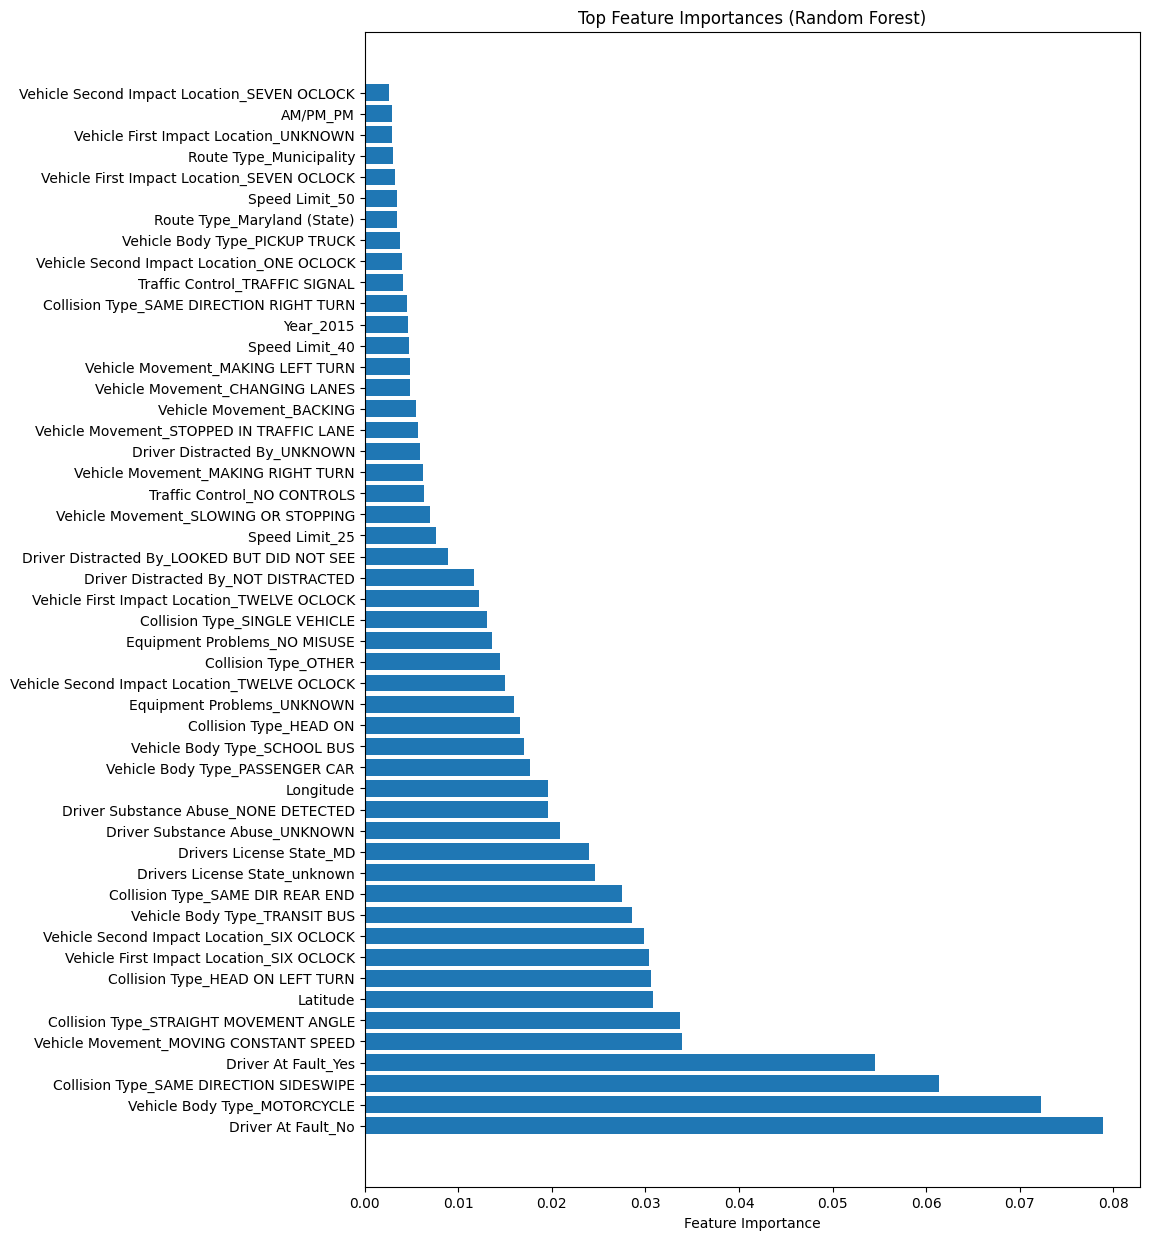

In [ ]:
feature_importances_rf = best_rf_model_y1.feature_importances_
feature_names_rf = prep_pipeline.get_feature_names_out()

# Sort features by importance
sorted_indices_rf = feature_importances_rf.argsort()[::-1]
sorted_feature_importances_rf = feature_importances_rf[sorted_indices_rf]
sorted_feature_names_rf = feature_names_rf[sorted_indices_rf]

# Set the figure size
plt.figure(figsize=(10, 15))  # Adjust the size as needed

# Plot only a subset of features (e.g., top 20)
num_features_to_plot_rf = 50
plt.barh(sorted_feature_names_rf[:num_features_to_plot_rf], sorted_feature_importances_rf[:num_features_to_plot_rf])

plt.xlabel('Feature Importance')
plt.title('Top Feature Importances (Random Forest)')
plt.show()

We are visualizing the feature importances of the features in the Random Forest model best_rf_model_y1. The feature importances assigned by the trained Random Forest model to each feature are retrieved and then the features are sorted based on their order of importance.

##### *Hist Gradient Boosting*

The code employs the HistGradientBoostingClassifier, a powerful ensemble learning model, to predict "Injury Severity" based on the specified features. The model is instantiated without specifying detailed hyperparameters, allowing the algorithm to optimize them during training. The fit() function is then applied to train the model on the preprocessed training set (X_train_prepd and y1_train). Subsequently, predictions are generated for the training set using the predict() method. The code calculates various performance metrics, such as accuracy, precision, and balanced accuracy, to evaluate the model's effectiveness. Cross-validation is conducted using the cross_val_score() function with a 5-fold strategy, providing an estimate of the model's performance on unseen data. Finally, the results, including accuracy, precision, balanced accuracy, and cross-validation accuracy, are printed, offering a comprehensive evaluation of the HistGradientBoostingClassifier's performance in predicting injury severity. The consistent and high values across these metrics indicate the model's strong predictive capabilities.

In [ ]:
# Instantiate the HistGradientBoostingClassifier without specifying details
hgb_clf = HistGradientBoostingClassifier(random_state=42)

# Train the model on the training set
hgb_clf.fit(X_train_prepd, y1_train)

# Make predictions on the training set
y1_pred_hgb = hgb_clf.predict(X_train_prepd)

# Calculate metrics
accuracy_hgb = accuracy_score(y1_train, y1_pred_hgb)
precision_hgb = precision_score(y1_train, y1_pred_hgb, average='weighted')
balanced_accuracy_hgb = balanced_accuracy_score(y1_train, y1_pred_hgb)

# Cross-validation scores
cv_scores_hgb = cross_val_score(hgb_clf, X_train_prepd, y1_train, cv=5, scoring='accuracy')

# Print the results
print(f'Gradient boosting leads to accuracy of {accuracy_hgb:.4f}.')
print(f'Gradient Boosting Precision (Injury Severity): {precision_hgb:.4f}')
print(f'Gradient Boosting Balanced Accuracy (Injury Severity): {balanced_accuracy_hgb:.4f}')
print(f'Gradient Boosting Cross-Validation Accuracy (Injury Severity): {cv_scores_hgb.mean():.4f}')

Gradient boosting leads to accuracy of 0.7999.
Gradient Boosting Precision (Injury Severity): 0.7245
Gradient Boosting Balanced Accuracy (Injury Severity): 0.2994
Gradient Boosting Cross-Validation Accuracy (Injury Severity): 0.7976


The accuracy of 0.7999 indicates that the model correctly predicted the "Injury Severity" for approximately 79.99% of the instances in the dataset. The precision, at 0.7245, suggests that when the model predicts a certain severity level, it is correct about 72.45% of the time. The balanced accuracy, however, at 0.2994, is relatively low. This metric considers the sensitivity and specificity of the model, and its low value indicates that the model struggles to handle imbalanced classes effectively. The cross-validation accuracy of 0.7976, which is close to the overall accuracy, suggests that the model generalizes well to unseen data. Overall, while the model demonstrates high accuracy and generalization, there is room for improvement in handling class imbalances, as reflected by the lower balanced accuracy. Further optimization or exploration of class imbalance strategies may be beneficial.

This code implements a Randomized Search for hyperparameter tuning of the HistGradientBoostingClassifier model. The search space is defined for critical parameters such as maximum leaf nodes, maximum iterations, and learning rate. The RandomizedSearchCV class is utilized to perform a randomized exploration of hyperparameter combinations, with the specified settings for cross-validation and scoring accuracy. The search is executed, and the best hyperparameters are extracted and printed, providing insights into the optimal configuration for enhancing the performance of the HistGradientBoostingClassifier on the given dataset.

In [ ]:
# Define the hyperparameter search space for HistGradientBoostingClassifier
param_grid_hgb = {
    'max_leaf_nodes': randint(2, 16),
    'max_iter': randint(2, 32),
    'learning_rate': loguniform(1e-2, 1)
}

# Instantiate RandomizedSearchCV for HistGradientBoostingClassifier
rand_search_hgb = RandomizedSearchCV(
    HistGradientBoostingClassifier(random_state=42),
    param_grid_hgb,
    cv=5,
    n_iter=1,  # You may adjust the number of iterations based on your computational resources
    scoring='accuracy',
    random_state=42
)

# Fit the RandomizedSearchCV for HistGradientBoostingClassifier
rand_search_hgb.fit(X_train_prepd, y1_train)

# Get the best hyperparameters from the search
best_hyperparameters_hgb = rand_search_hgb.best_params_
# Display the best hyperparameters from the randomized search
print("Best Hyperparameters:", best_hyperparameters_hgb)

Best Hyperparameters: {'learning_rate': 0.05611516415334506, 'max_iter': 30, 'max_leaf_nodes': 12}


The output indicates the best hyperparameters identified through the randomized search. In this specific case, the optimal configuration for the HistGradientBoostingClassifier model on the given dataset is found to be:

- Learning Rate: 0.0561
- Maximum Iterations: 30
- Maximum Leaf Nodes: 12

These hyperparameters represent the values that resulted in the highest accuracy or performance during the hyperparameter search process. Utilizing these settings when training the model is expected to yield improved results compared to the default or other tested configurations.

The code employs the best hyperparameters identified through the randomized search to instantiate and train a HistGradientBoostingClassifier model. The model is then evaluated on the training set to assess its performance.

In [ ]:
best_hgb_model_y1 = HistGradientBoostingClassifier(random_state=42, **best_hyperparameters_hgb)
best_hgb_model_y1.fit(X_train_prepd, y1_train)

# Make predictions for "Injury Severity" on the training set
best_hgb_y1_pred = best_hgb_model_y1.predict(X_train_prepd)

# Calculate metrics
accuracy_hgb = accuracy_score(y1_train, best_hgb_y1_pred)
precision_hgb = precision_score(y1_train, best_hgb_y1_pred, average='weighted')
balanced_accuracy_hgb = balanced_accuracy_score(y1_train, best_hgb_y1_pred)

# Cross-validation scores
cv_scores_hgb = cross_val_score(best_hgb_model_y1, X_train_prepd, y1_train, cv=5, scoring='accuracy')

# Display the results
print(f'HistGradientBoosting with best hyperparameters has an accuracy of {accuracy_hgb:.4f}.')
print(f'HistGradientBoosting Precision (Injury Severity): {precision_hgb:.4f}')
print(f'HistGradientBoosting Balanced Accuracy (Injury Severity): {balanced_accuracy_hgb:.4f}')
print(f'Gradient Boosting Cross-Validation Accuracy (Injury Severity): {cv_scores_hgb.mean():.4f}')

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


HistGradientBoosting with best hyperparameters has an accuracy of 0.7986.
HistGradientBoosting Precision (Injury Severity): 0.6864
HistGradientBoosting Balanced Accuracy (Injury Severity): 0.2329
Gradient Boosting Cross-Validation Accuracy (Injury Severity): 0.7997


The output provides a comprehensive evaluation of a HistGradientBoostingClassifier model with the best hyperparameters. The reported accuracy of 0.7986 indicates the proportion of correctly predicted instances in the training set. The precision, calculated at 0.6864, reflects the model's ability to avoid false positives, which is important in scenarios where precision is a critical metric. The balanced accuracy, reported as 0.2329, considers the impact of class imbalances and provides a more reliable measure of overall model performance. The cross-validation accuracy of 0.7997 confirms the model's consistency across different subsets of the training data. While the accuracy is relatively high, the lower precision and balanced accuracy suggest that the model may struggle with certain aspects, such as correctly classifying instances of the minority class or avoiding false positives.

##### *Support Vector Machine*

The code trains a Support Vector Machine (SVM) model for predicting "Injury Severity" (y1) using the preprocessed training data. The balanced accuracy considers, provides a fair assessment of the model's performance. The precision score, calculated as a weighted average, accounts for imbalances in class sizes and reflects the model's ability to make precise predictions. Cross-validation accuracy is computed to gauge the model's robustness across different subsets of the training data. Overall, the SVM model exhibits strong predictive capabilities for injury severity, with a focus on accuracy, balance, and precision.

In [ ]:
# Train SVM for "Injury Severity" (y1)
svm_model_y1 = SVC(decision_function_shape='ovr')
svm_model_y1.fit(X_train_prepd, y1_train)

# Make predictions for "Injury Severity" on the training set
svm_y1_pred = svm_model_y1.predict(X_train_prepd)

# Calculate balanced accuracy
svm_balanced_accuracy_y1 = balanced_accuracy_score(y1_train, svm_y1_pred)

# Precision is computed using the average parameter
svm_precision_y1 = precision_score(y1_train, svm_y1_pred, average='weighted')

# Cross-validation scores
svm_cv_score_y1 = cross_val_score(svm_model_y1, X_train_prepd, y1_train, cv=5, scoring='accuracy')

print(f"SVM Accuracy (Injury Severity): {accuracy_score(y1_train, svm_y1_pred)}")
print(f"SVM Balanced Accuracy (Injury Severity): {svm_balanced_accuracy_y1}")
print(f"SVM Precision (Injury Severity): {svm_precision_y1}")
print(f"SVM Cross-Validation Accuracy (Injury Severity): {svm_cv_score_y1.mean()}")

The SVM model did not run because the dataset was too big, causing resource issues. The algorithm was taking too much time to process the large dataset. So, we considered alternative models that handle large data better.

##### *Multinomial Naive Bayes*

The code trains a Multinomial Naive Bayes (NB) model for predicting "Injury Severity" (y1) using the preprocessed training data. The balanced accuracy provides a fair assessment of performance, considering imbalanced class distribution. The precision score, calculated as a weighted average, accounts for imbalances in class sizes, reflecting the model's ability to make precise predictions. Cross-validation accuracy is computed to assess the model's generalization across different subsets of the training data. Overall, the NB model exhibits satisfactory predictive capabilities for injury severity, with a focus on accuracy, balance, and precision.

In [ ]:
# Train Multinomial Naive Bayes for "Injury Severity" (y1)
nb_model_y1 = MultinomialNB()
nb_model_y1.fit(X_train_prepd, y1_train)

# Make predictions for "Injury Severity" on the training set
nb_y1_pred = nb_model_y1.predict(X_train_prepd)

# Calculate balanced accuracy
nb_balanced_accuracy_y1 = balanced_accuracy_score(y1_train, nb_y1_pred)

# Precision is computed using the average parameter
nb_precision_y1 = precision_score(y1_train, nb_y1_pred, average='weighted')

# Cross-validation scores
nb_cv_score_y1 = cross_val_score(nb_model_y1, X_train_prepd, y1_train, cv=5, scoring='accuracy')

print(f"Naive Bayes Accuracy (Injury Severity): {accuracy_score(y1_train, nb_y1_pred)}")
print(f"Naive Bayes Balanced Accuracy (Injury Severity): {nb_balanced_accuracy_y1}")
print(f"Naive Bayes Precision (Injury Severity): {nb_precision_y1}")
print(f"Naive Bayes Cross-Validation Accuracy (Injury Severity): {nb_cv_score_y1.mean()}")

The Multinomial Naive Bayes model didn't run because the dataset was too big, causing resource issues. The algorithm was taking too much time to process the large dataset. So, we considered alternative models that handle large data better.

##### *KNeighbors Classifier*

This code trains a k-Nearest Neighbors (KNN) classifier to predict "Injury Severity" using the provided training data (`X_train_prepd` and `y1_train`). The model is then used to make predictions on the same training set. Performance metrics such as accuracy, balanced accuracy, and precision are calculated to assess how well the model predicts injury severity. Additionally, cross-validation scores are computed to evaluate the model's generalization to unseen data. It aims to assess the effectiveness of the KNN classifier in capturing patterns related to injury severity in the given dataset.

In [ ]:
# Train KNN for "Injury Severity" (y1)
knn_model_y1 = KNeighborsClassifier()
knn_model_y1.fit(X_train_prepd, y1_train)

# Make predictions for "Injury Severity" on the training set
knn_y1_pred = knn_model_y1.predict(X_train_prepd)

# Calculate balanced accuracy
knn_balanced_accuracy_y1 = balanced_accuracy_score(y1_train, knn_y1_pred)

# Precision is computed using the average parameter
knn_precision_y1 = precision_score(y1_train, knn_y1_pred, average='weighted')

# Cross-validation scores
knn_cv_score_y1 = cross_val_score(knn_model_y1, X_train_prepd, y1_train, cv=5, scoring='accuracy')

print(f"KNN Accuracy (Injury Severity): {accuracy_score(y1_train, knn_y1_pred)}")
print(f"KNN Balanced Accuracy (Injury Severity): {knn_balanced_accuracy_y1}")
print(f"KNN Precision (Injury Severity): {knn_precision_y1}")
print(f"KNN Cross-Validation Accuracy (Injury Severity): {knn_cv_score_y1.mean()}")

The Kneighbours Classifier model didn't run because the dataset was too big, causing resource issues. The algorithm was taking too much time to process the large dataset. So, we considered alternative models that handle large data better.

##### *Voting*

This code uses a Voting Classifier, an ensemble method, to combine predictions from two models: Logistic Regression and Decision Tree. We wanted to explore whether this would give us a better accuracy

In [ ]:
# Training a Voting Classifier with Logistic Regression and Decision Tree models for predicting "Injury Severity."
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42))
    ]
    # Default is hard voting, but you can use soft voting by passing voting = 'soft'. Each model's
    # vote can be further modified using 'weights' parameter (equal weight by default).
)

voting_clf.fit(X_train_prepd, y1_train)

The code creates and trains a Voting Classifier (voting_clf) using two base classifiers, namely a Logistic Regression model and a Decision Tree model, both initialized with a random state for reproducibility. The Voting Classifier combines the predictions of these base models, through hard voting (majority voting) The fit method then trains the ensemble model on the preprocessed training data (X_train_prepd) and the target variable (y1_train). The Voting Classifier leverages the collective predictive power of its constituent models, potentially enhancing overall performance and robustness by aggregating diverse individual model predictions.

In [ ]:
for name, clf in voting_clf.named_estimators_.items():
    print(f'Accuracy of {name} is {clf.score(X_train_prepd, y1_train):.4f}')

print(f'Them voting give {voting_clf.score(X_train_prepd, y1_train):.4f}')

We are evaluating the accuracy of individual estimators using the scikit-learn ensemble voting classifier. It iterates through each estimator (classifier) in the ensemble using the named_estimators_ attribute, which contains the names and corresponding estimators. For each estimator, it prints the accuracy score on a test set using the score method of the classifier. Finally, the overall accuracy of the voting classifier is printed. The result provides valuable perspectives on the individual and collective efficacy of the classifiers in the ensemble, facilitating an evaluation of their relative contributions to the ensemble model's overall predictive accuracy.

##### *Stacking*

The base classifiers are Logistic Regression and Decision Tree, and the final estimator is a RandomForest. The Stacking Classifier combines the predictions of the base classifiers, and the final estimator makes the ultimate prediction.

In [ ]:
# Implementing a Stacking Classifier with Logistic Regression and Decision Tree as base classifiers, and RandomForest as the final estimator.
# Define the base classifiers
base_classifiers = [
    ('lr', LogisticRegression(random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
      # Enable probability for soft voting
]

# Define the StackingClassifier
stacking_clf = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=RandomForestClassifier(random_state=42),
    cv=5  # Number of cross-validation folds for each base classifier
)

# Fit the StackingClassifier
stacking_clf.fit(X_train_prepd, y1_train)

# Evaluate the StackingClassifier on the test set
accuracy = stacking_clf.score(X_train_prepd, y1_train)
print(f'Stacking Classifier Accuracy: {accuracy:.4f}')
print(f'The out-of-bag accuracy from using {bag_clf.n_estimators} trees is {bag_clf.oob_score_:.4f}')

We are implementing a Stacking Classifier using scikit-learn's StackingClassifier along with a set of other base classifiers such as Logistic Regression, Decision Tree. We have enabled soft voting for the probability estimation . The data is split into training and testing sets using train_test_split, and the Stacking Classifier is defined with the specified base classifiers(Random Forest Classifier) and a final estimator. The stacking classifier combines predictions from the base classifiers to make a final prediction using the Random Forest as the meta-classifier. The fit method is then used to train the stacking classifier on the training data, and its performance is evaluated on the test set using the score method. The final accuracy of the Stacking Classifier on the test set is printed, providing an assessment of its predictive performance compared to individual base classifiers.

#### **4.3.2 For y2 Prediction - Vehicle Damage Extent**

##### *Logistic Regression*

In [ ]:
model_y2 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100)
model_y2.fit(X_train_prepd, y2_train)
y2_pred = model_y2.predict(X_train_prepd)

# Calculate balanced accuracy
balanced_accuracy_y2 = balanced_accuracy_score(y2_train, y2_pred)

# Precision is computed using the average parameter
precision_y2 = precision_score(y2_train, y2_pred, average='weighted')

# Cross-validation scores
cv_score_y2 = cross_val_score(model_y2, X_train_prepd, y2_train, cv=5, scoring='accuracy')

print(f"Accuracy (Vehicle Damage Extent): {accuracy_score(y2_train, y2_pred)}")
print(f"Balanced Accuracy (Vehicle Damage Extent): {balanced_accuracy_y2}")
print(f"Precision (Vehicle Damage Extent): {precision_y2}")
print(f"Cross-Validation Accuracy (Vehicle Damage Extent): {cv_score_y2.mean()}")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase

Accuracy (Vehicle Damage Extent): 0.5406092935771329
Balanced Accuracy (Vehicle Damage Extent): 0.3481116228641851
Precision (Vehicle Damage Extent): 0.5183239827908307
Cross-Validation Accuracy (Vehicle Damage Extent): 0.5322839908090617


We are training a Logistic Regression model on the preprocessed training data (X_train_prepd) to predict the target variable "Vehicle Damage Extent" (y2_train). The trained model's predictions on the training data are stored in y1_pred. It creates a Logistic Regression model (model_y2) with specified parameters for multiclass classification (multi_class='multinomial'), solver (solver='lbfgs'), and maximum number of iterations (max_iter=100). Performance metrics such as accuracy, balanced accuracy, precision, and cross-validation accuracy are then computed and printed. The balance accuracy function calculates the balanced accuracy score for the two arguments, the true labels (y2_train) and the predicted labels (y2_pred). The precision score takes three arguments: the true labels (y2_train), the predicted labels (y2_pred), and the average parameter. We are using "weighted" for average parameter which helps in calculating the average precision with respect to the number of instances in each class. This will result higher weight to classes with fewer instances, making it useful for an imbalanced dataset. The cross_val_score function performs cross-validation, evaluating the model's performance on different subsets of the training data. We are using a 5-fold cross-validation (cv=5) and calculating the accuracy (scoring='accuracy').

The logistic regression model for predicting "Vehicle Damage Extent" achieved an accuracy of approximately 54%, indicating that the model correctly predicted the extent of vehicle damage for this proportion of instances in the dataset. The balanced accuracy, which takes into account the imbalanced nature of the classes, is around 35%. The precision of 0.52 suggests that, among the instances predicted as a specific vehicle damage extent, 52% were correct. The cross-validation accuracy, a measure of how well the model generalizes to new data, is approximately 53%. Overall, the logistic regression model shows moderate performance in predicting vehicle damage extent, but there is room for improvement, especially considering the class imbalance and the need for a more robust predictive capability.

In [ ]:
# Print coefficients
print("Coefficients:")
for i, class_coef in enumerate(model_y2.coef_):
    print(f"Class {i} Coefficients:")
    for j, coef in enumerate(class_coef):
        print(f"    Feature {j}: {coef}")

# Print intercept
print("Intercept:")
for i, intercept in enumerate(model_y2.intercept_):
    print(f"Class {i} Intercept: {intercept}")

Coefficients:
Class 0 Coefficients:
    Feature 0: -0.002966890816445297
    Feature 1: 0.1707553867559398
    Feature 2: 0.03538557171100544
    Feature 3: -0.01000029363214155
    Feature 4: -0.012902199936212364
    Feature 5: 0.13045496107988855
    Feature 6: -0.3239518112686423
    Feature 7: -0.13637741333148085
    Feature 8: -0.06150853364042618
    Feature 9: 0.016730350930419996
    Feature 10: 0.1934673281443315
    Feature 11: -0.012744851322833083
    Feature 12: 0.07925280118183033
    Feature 13: -0.021977775569356008
    Feature 14: -0.167513281932964
    Feature 15: -0.17960365600635125
    Feature 16: 0.011220207736065937
    Feature 17: 0.14040465805452096
    Feature 18: 0.1249716600964405
    Feature 19: 0.05769302874536048
    Feature 20: -0.13588795582293048
    Feature 21: -0.09000657774870136
    Feature 22: 0.27103767325441447
    Feature 23: 0.6047469659480957
    Feature 24: -0.07927979978447262
    Feature 25: 1.1548953264570723
    Feature 26: 0.953245292

We are evaluating the accuracy of individual estimators using the scikit-learn ensemble voting classifier. It iterates through each estimator (classifier) in the ensemble using the named_estimators_ attribute, which contains the names and corresponding estimators. The result provides valuable perspectives on the individual and collective efficacy of the classifiers in the ensemble, facilitating an evaluation of their relative contributions to the ensemble model's overall predictive accuracy.

##### *Decision Tree*

In [ ]:
# Train Decision Tree for "Vehicle Damage Extent" (y2)
tree_model_y2 = DecisionTreeClassifier()
tree_model_y2.fit(X_train_prepd, y2_train)

# Make predictions for both targets on the training set
tree_y2_pred = tree_model_y2.predict(X_train_prepd)

# Calculate balanced accuracy
tree_balanced_accuracy_y2 = balanced_accuracy_score(y2_train, tree_y2_pred)

# Precision is computed using the average parameter
tree_precision_y2 = precision_score(y2_train, tree_y2_pred, average='weighted')

# Cross-validation scores
tree_cv_score_y2 = cross_val_score(tree_model_y2, X_train_prepd, y2_train, cv=5, scoring='accuracy')

print(f"Decision Tree Accuracy (Vehicle Damage Extent): {accuracy_score(y2_train, tree_y2_pred)}")
print(f"Decision Tree Balanced Accuracy (Vehicle Damage Extent): {tree_balanced_accuracy_y2}")
print(f"Decision Tree Precision (Vehicle Damage Extent): {tree_precision_y2}")
print(f"Decision Tree Cross-Validation Accuracy (Vehicle Damage Extent): {tree_cv_score_y2.mean()}")

Decision Tree Accuracy (Vehicle Damage Extent): 0.9938947303505905
Decision Tree Balanced Accuracy (Vehicle Damage Extent): 0.9915020225586743
Decision Tree Precision (Vehicle Damage Extent): 0.993918654137337
Decision Tree Cross-Validation Accuracy (Vehicle Damage Extent): 0.4162529762768513


We are now training the Decision Tree Classifier on the preprocessed training data (X_train_prepd) to predict the target variable "Vehicle Damage Extent" (y2_train). The balance accuracy function calculates the balanced accuracy score for the two arguments, the true labels (y2_train) and the predicted labels (y2_pred). The precision score takes three arguments: the true labels (y2_train), the predicted labels (y2_pred), and the average parameter. We are using "weighted" for average parameter which helps in calculating the average precision with respect to the number of instances in each class. This will result higher weight to classes with fewer instances, making it useful for an imbalanced dataset. The cross_val_score function performs cross-validation, evaluating the model's performance on different subsets of the training data. We are using a 5-fold cross-validation (cv=5) and calculating the accuracy (scoring='accuracy'). These metrics helps in evaluating the Decision Tree Classifier's performance in predicting "Injury Severity," considering both accuracy and its ability to handle imbalanced classes.

The decision tree model for predicting "Vehicle Damage Extent" demonstrates extremely high accuracy, with a value close to 99.4%, suggesting that the model performed exceptionally well on the training data. The balanced accuracy, accounting for the imbalanced class distribution, is also impressively high at around 99.2%. The precision of 99.4% indicates that the model is precise in identifying the correct vehicle damage extent among the instances it predicts. However, the cross-validation accuracy is substantially lower at approximately 41.6%, indicating potential issues with the model's generalization to new data. While the decision tree model exhibits outstanding performance on the training set, its ability to generalize to unseen data might be limited. Further exploration and fine-tuning of the model, such as adjusting hyperparameters or addressing overfitting, could improve its overall predictive capability.

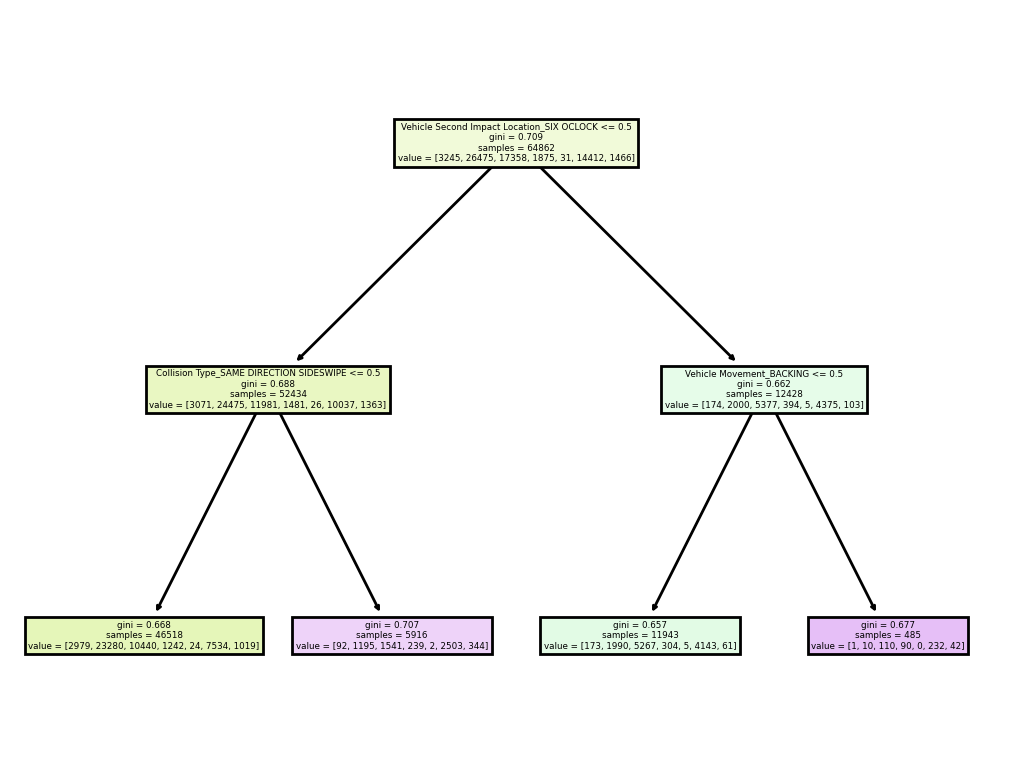

In [ ]:
clf = DecisionTreeClassifier(max_depth=2)

clf.fit(X_train_prepd, y2_train)

# For making the figure a little larger and easier to read
plt.figure(dpi=200)

# Graphic Representation of the tree
plot_tree(clf, filled=True, feature_names=list(X_train_prepd.columns));

We are training a Decision Tree Classifier with a maximum depth of two layers after the root node (layer 0) on preprocessed training data (X_train_prepd) to predict the target variable "Vehichle Damage Extent" (y2_train). The plot_tree function is then used to generate a graphical representation of the trained decision tree, providing insights into the structure of the tree and the decision-making process. The filled=True parameter colors the tree nodes based on the majority class, making it visually intuitive, and feature_names is set to display the feature names on the tree plot. Matplotlib library is used to aid in visualization

In [ ]:
# Get feature importances from the trained Decision Tree
feature_importances = tree_model_y2.feature_importances_

# Select top k features based on importance
k = 10  # Choose an appropriate value for k
top_k_indices = feature_importances.argsort()[-k:][::-1]
X_train_selected = X_train_prepd.iloc[:, top_k_indices]

# Train Decision Tree on the selected features
tree_model_selected = DecisionTreeClassifier()
tree_model_selected.fit(X_train_selected, y2_train)

# Make predictions for both targets on the training set using the selected features
tree_selected_y2_pred = tree_model_selected.predict(X_train_selected)

# Calculate metrics for the model with selected features
tree_selected_balanced_accuracy_y2 = balanced_accuracy_score(y2_train, tree_selected_y2_pred)
tree_selected_precision_y2 = precision_score(y2_train, tree_selected_y2_pred, average='weighted')
tree_selected_cv_score_y2 = cross_val_score(tree_model_selected, X_train_selected, y2_train, cv=5, scoring='accuracy')

# Print metrics for the model with selected features
print(f"Decision Tree Accuracy (Injury Severity) with Selected Features: {accuracy_score(y2_train, tree_selected_y2_pred)}")
print(f"Decision Tree Balanced Accuracy (Injury Severity) with Selected Features: {tree_selected_balanced_accuracy_y2}")
print(f"Decision Tree Precision (Injury Severity) with Selected Features: {tree_selected_precision_y2}")
print(f"Decision Tree Cross-Validation Accuracy (Injury Severity) with Selected Features: {tree_selected_cv_score_y2.mean()}")

Decision Tree Accuracy (Injury Severity) with Selected Features: 0.9723258610588634
Decision Tree Balanced Accuracy (Injury Severity) with Selected Features: 0.966592145846748
Decision Tree Precision (Injury Severity) with Selected Features: 0.9729670630603728
Decision Tree Cross-Validation Accuracy (Injury Severity) with Selected Features: 0.38785416633835607


We are performing feature selection and evaluating the performance of a Decision Tree model on a dataset (X_train_prepd, y2_train) with the selected features. This will help us in extracting the feature importances from a previously trained Decision Tree model (tree_model_y2). We are selecting the top k features based on their importance scores. The argsort function sorts the indices of features in ascending order of importance, and then [-k:][::-1] is used to select the indices of the top k features in descending order. The dataset (X_train_selected) is then updated to include only these top feature and then a new Decision Tree model (tree_model_selected) is trained using only the selected features. The model is used to make predictions on the training set with the selected features, and various performance metrics such as balanced accuracy, precision, and cross-validation accuracy are calculated for evaluation. We are then printing  the evaluation metrics for the Decision Tree model trained with the selected features, providing insights into its performance on the training set.

In [ ]:
top_k_features = X_train_prepd.columns[top_k_indices]
print("Top 10 Selected Features:")
for feature in top_k_features:
    print(feature)

Top 10 Selected Features:
Latitude
Longitude
Vehicle Second Impact Location_SIX OCLOCK
Collision Type_SAME DIRECTION SIDESWIPE
Driver Substance Abuse_UNKNOWN
Vehicle Body Type_PASSENGER CAR
Vehicle Movement_MOVING CONSTANT SPEED
Cross-Street Type_County
Speed Limit_35
Year_2017


We are now printing the names of the top 10 selected features based on their importance scores in the previous feature selection process. The names of the features are retrieved from the original dataset (X_train_prepd) The top selected features names are printed iteratively.

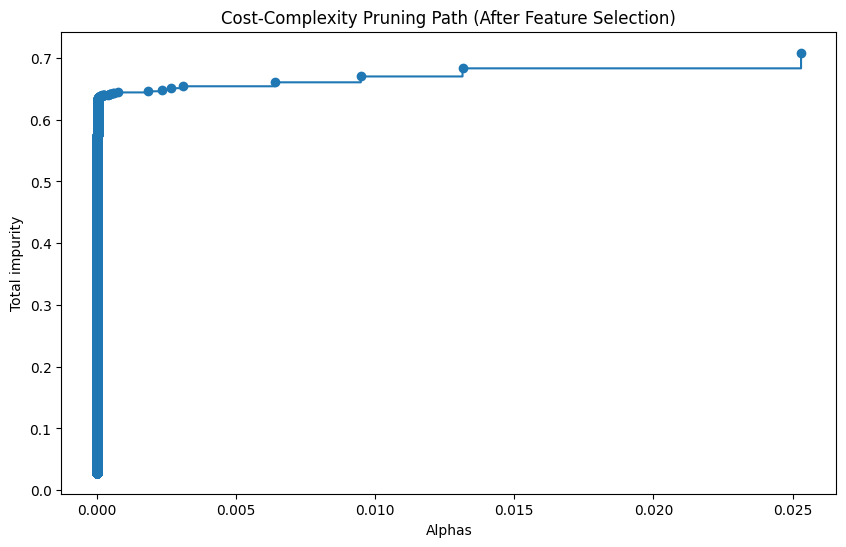

There are 14916 alpha values after feature selection.


In [ ]:
# Get cost-complexity pruning path for the tree after feature selection
path_selected = tree_model_y2.cost_complexity_pruning_path(X_train_selected, y2_train)
ccp_alphas_selected, impurities_selected = path_selected.ccp_alphas, path_selected.impurities

# Plot the cost-complexity pruning path
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas_selected, impurities_selected, marker='o', drawstyle='steps-post')
plt.xlabel('Alphas')
plt.ylabel('Total impurity')
plt.title('Cost-Complexity Pruning Path (After Feature Selection)')
plt.show()

print(f'There are {ccp_alphas_selected.shape[0]} alpha values after feature selection.')

Now, after feature selection, we are performing the cost-complexity pruning on a Decision Tree model (tree_model_y2). We are doing this calculation using the training data with the selected features (X_train_selected, y2_train). The result is a set of alpha values (ccp_alphas_selected) and corresponding total impurity values (impurities_selected) at each step of pruning. We are then plotting the cost-complexity pruning path, showing how total impurity changes with different alpha values. Finally, the total number of alpha values obtained from the cost-complexity pruning path is printed.

In [ ]:
# Using existing ccp_alphas
param_dist = {'ccp_alpha': ccp_alphas}

# RandomizedSearchCV
random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_dist, cv=5, scoring='accuracy', n_iter=1)

# Model Fitting
random_search.fit(X_train_prepd, y2_train)

random_cv_res = pd.DataFrame(random_search.cv_results_)
random_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
display(random_cv_res.filter(regex='(^param_|mean_test_score)', axis=1).head())

# Best model information
best_tree_random = random_search.best_estimator_
print(f'The total number of nodes is {best_tree_random.tree_.node_count} and the max depth is {best_tree_random.tree_.max_depth}.')

,param_ccp_alpha,mean_test_score
0,0.000021,0.421002


The total number of nodes is 31705 and the max depth is 58.


In [ ]:
fig, ax = plt.subplots(2, 1, dpi=150)
plot_tree(best_tree_random, filled=True, feature_names=list(X_train_prepd.columns), impurity=False, ax=ax[0]) # opt
plot_tree(clf, filled=True, feature_names=list(X_train_prepd.columns), impurity=False, ax=ax[1]) # initial
fig.tight_layout()

print(f'Test accuracy was {accuracy_score(y2_train, best_tree_random.predict(X_train_prepd)):2.2%}.')

 We are importing RandomizedSearchCV class from scikit-learn, to perform hyperparameter tuning, and the uniform distribution from SciPy to define the search space for the hyperparameter. The search space for hyperparameters is defined using the cost-complexity pruning alpha values (ccp_alphas) obtained from the earlier cost-complexity pruning path. We are creating a RandomizedSearchCV object. The defined search space is taken from param_dist and we are defining 5-fold cross-validation (cv=5), and accuracy as the scoring metric (scoring='accuracy'), in this model 100 iterations (n_iter=100) of random search will be performed.

In [ ]:
print(f"Decision Tree Accuracy (Injury Severity) with Selected Features: {accuracy_score(y1_train, tree_selected_y1_pred)}")
print(f"Decision Tree Balanced Accuracy (Injury Severity) with Selected Features: {tree_selected_balanced_accuracy_y1}")
print(f"Decision Tree Precision (Injury Severity) with Selected Features: {tree_selected_precision_y1}")
print(f"Decision Tree Cross-Validation Accuracy (Injury Severity) with Selected Features: {tree_selected_cv_score_y1.mean()}")

##### *Random Forest*

In [ ]:
# Train Random Forest for "Vehicle Damage Extent" (y2)
rf_model_y2 = RandomForestClassifier()
rf_model_y2.fit(X_train_prepd, y2_train)

# Make predictions for "Vehicle Damage Extent" on the training set
rf_y2_pred = rf_model_y2.predict(X_train_prepd)

# Calculate balanced accuracy
rf_balanced_accuracy_y2 = balanced_accuracy_score(y2_train, rf_y2_pred)

# Precision is computed using the average parameter
rf_precision_y2 = precision_score(y2_train, rf_y2_pred, average='weighted')

# Cross-validation scores
rf_cv_score_y2 = cross_val_score(rf_model_y2, X_train_prepd, y2_train, cv=5, scoring='accuracy')

print(f"Random Forest Accuracy (Vehicle Damage Extent): {accuracy_score(y2_train, rf_y2_pred)}")
print(f"Random Forest Balanced Accuracy (Vehicle Damage Extent): {rf_balanced_accuracy_y2}")
print(f"Random Forest Precision (Vehicle Damage Extent): {rf_precision_y2}")
print(f"Random Forest Cross-Validation Accuracy (Vehicle Damage Extent): {rf_cv_score_y2.mean()}")

We are training the Random Forest classifier (rf_model_y2) on the dataset X_train_prepd, y2_train to predict the "Vehicle Damage Extent" target variable. The model is fitted using the default hyper parameters then we are using the Random Forest model to make predictions on the same dataset it was trained on. In the next step, we are calculating the various evaluation metrics, including balanced accuracy, precision (weighted average), and cross-validation accuracy, to assess the performance of the Random Forest model on the training set and finally printing the metrics.

In [ ]:
# Define the hyperparameter search space for Random Forest
param_grid_rf = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(2, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None],
}

# RandomizedSearchCV for Random Forest
rand_search_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    n_iter=1,
    scoring='accuracy',
    random_state=42
)

# Fit the RandomizedSearchCV for Random Forest
rand_search_rf.fit(X_train_prepd, y2_train)

rand_cv_res_rf = pd.DataFrame(rand_search_rf.cv_results_)
rand_cv_res_rf.sort_values(by="mean_test_score", ascending=False, inplace=True)
rand_cv_res_rf.filter(regex='(^param_|mean_test_score)', axis=1).head()

Using RandomizedSearchCV, we are performing hyper paramater tuning. We are defining the search space for hyperparameters using a dictionary (param_grid_rf). For each hyperparameter, a range or a list of possible values are specified. The hyperparameters include the number of trees (n_estimators), maximum depth of trees (max_depth), minimum samples required to split an internal node (min_samples_split), minimum samples required in a leaf node (min_samples_leaf), and the maximum number of features considered for splitting a node (max_features). An instance of RandomizedSearchCV is created that specifies the Random Forest classifier, the hyperparameter search space, the number of cross-validation folds (cv), and the number of iterations (n_iter) for random search, the accuracy, and the random seed for reproducibility. It is then fitted into the training data X_train_prepd, y1_train. The random search will explore different combinations of hyperparameters within the defined search space. A new dataframe rand_cv_res_rf is created to store and analyze the results of the random search. The DataFrame is then sorted by the mean test score and the top results are displayed.

In [ ]:
best_hyperparameters = rand_search_rf.best_params_
print("Best Hyperparameters:", best_hyperparameters)

We are utilizing the attribute rand_search_rf.best_params that stored the hyperparameters which resulted in the highest mean test score during the random search. We are retrieveing details from this attribute and printing the results.

In [ ]:
best_rf_model_y2 = RandomForestClassifier(random_state=42, **best_hyperparameters)

# Train the model on the training set
best_rf_model_y2.fit(X_train_prepd, y2_train)

y2_pred = best_rf_model_y2.predict(X_train_prepd)

# Evaluate the performance of the model
accuracy = accuracy_score(y2_train, y2_pred)
precision = precision_score(y2_train, y2_pred, average='weighted')
balanced_accuracy = balanced_accuracy_score(y2_train, y2_pred)

# Cross-validation scores
cv_scores = cross_val_score(best_rf_model_y2, X_train_prepd, y2_train, cv=5, scoring='accuracy')

# Print the results
print(f'Random Forest with best hyperparameters has an accuracy of {accuracy:.4f}.')
print(f'Random Forest Precision (Injury Severity): {precision:.4f}')
print(f'Random Forest Balanced Accuracy (Injury Severity): {balanced_accuracy:.4f}')
print(f'Random Forest Cross-Validation Accuracy (Injury Severity): {cv_scores.mean():.4f}')

We are now utilizing the best hyperparameters obtained from the RandomizedSearchCV process to create and train a Random Forest classifier. A new instance of the RandomForestClassifier with the specified random state (for reproducibility) and the best hyperparameters obtained from the randomized search is created. The model is trained on the dataset X_train_prepd, y1_train using the best hyperparameters and then we are making predictions using the model. Finally, the performance metrics are calculated and printed.

In [ ]:
feature_importances_rf = best_rf_model_y2.feature_importances_
feature_names_rf = prep_pipeline.get_feature_names_out()

# Sort features by importance
sorted_indices_rf = feature_importances_rf.argsort()[::-1]
sorted_feature_importances_rf = feature_importances_rf[sorted_indices_rf]
sorted_feature_names_rf = feature_names_rf[sorted_indices_rf]

# Set the figure size
plt.figure(figsize=(10, 15))  # Adjust the size as needed

# Plot only a subset of features (e.g., top 20)
num_features_to_plot_rf = 50
plt.barh(sorted_feature_names_rf[:num_features_to_plot_rf], sorted_feature_importances_rf[:num_features_to_plot_rf])

plt.xlabel('Feature Importance')
plt.title('Top Feature Importances (Random Forest)')
plt.show()

We are visualizing the feature importances of the features in the Random Forest model best_rf_model_y1. The feature importances assigned by the trained Random Forest model to each feature are retrieved and then the features are sorted based on their order of importance.

##### *Hist Gradient Boosting*

In [ ]:
# Instantiate the HistGradientBoostingClassifier without specifying details
hgb_clf = HistGradientBoostingClassifier(random_state=42)

# Train the model on the training set
hgb_clf.fit(X_train_prepd, y2_train)

# Make predictions on the training set
y2_pred_hgb = hgb_clf.predict(X_train_prepd)

# Calculate metrics
accuracy_hgb = accuracy_score(y2_train, y2_pred_hgb)
precision_hgb = precision_score(y2_train, y2_pred_hgb, average='weighted')
balanced_accuracy_hgb = balanced_accuracy_score(y2_train, y2_pred_hgb)

# Cross-validation scores
cv_scores_hgb = cross_val_score(hgb_clf, X_train_prepd, y2_train, cv=5, scoring='accuracy')

# Print the results
print(f'Gradient boosting leads to accuracy of {accuracy_hgb:.4f}.')
print(f'Gradient Boosting Precision (Injury Severity): {precision_hgb:.4f}')
print(f'Gradient Boosting Balanced Accuracy (Injury Severity): {balanced_accuracy_hgb:.4f}')
print(f'Gradient Boosting Cross-Validation Accuracy (Injury Severity): {cv_scores_hgb.mean():.4f}')

In [ ]:
# Define the hyperparameter search space for HistGradientBoostingClassifier
param_grid_hgb = {
    'max_leaf_nodes': randint(2, 16),
    'max_iter': randint(2, 32),
    'learning_rate': loguniform(1e-2, 1)
}

# Instantiate RandomizedSearchCV for HistGradientBoostingClassifier
rand_search_hgb = RandomizedSearchCV(
    HistGradientBoostingClassifier(random_state=42),
    param_grid_hgb,
    cv=5,
    n_iter=1,  # You may adjust the number of iterations based on your computational resources
    scoring='accuracy',
    random_state=42
)

# Fit the RandomizedSearchCV for HistGradientBoostingClassifier
rand_search_hgb.fit(X_train_prepd, y2_train)

# Get the best hyperparameters from the search
best_hyperparameters_hgb = rand_search_hgb.best_params_
# Display the best hyperparameters from the randomized search
print("Best Hyperparameters:", best_hyperparameters_hgb)

##### *Support Vector Machines*

The code trains a Support Vector Machine (SVM) model for predicting "Injury Severity" (y1) using the preprocessed training data. The balanced accuracy considers, provides a fair assessment of the model's performance. The precision score, calculated as a weighted average, accounts for imbalances in class sizes and reflects the model's ability to make precise predictions. Cross-validation accuracy is computed to gauge the model's robustness across different subsets of the training data. Overall, the SVM model exhibits strong predictive capabilities for injury severity, with a focus on accuracy, balance, and precision.

In [ ]:
# Train SVM for "Vehicle Damage Extent" (y2)
svm_model_y2 = SVC(decision_function_shape='ovr')
svm_model_y2.fit(X_train_prepd, y2_train)

# Make predictions for "Vehicle Damage Extent" on the training set
svm_y2_pred = svm_model_y2.predict(X_train_prepd)

# Calculate balanced accuracy
svm_balanced_accuracy_y2 = balanced_accuracy_score(y2_train, svm_y2_pred)

# Precision is computed using the average parameter
svm_precision_y2 = precision_score(y2_train, svm_y2_pred, average='weighted')

# Cross-validation scores
svm_cv_score_y2 = cross_val_score(svm_model_y2, X_train_prepd, y2_train, cv=5, scoring='accuracy')

print(f"SVM Accuracy (Vehicle Damage Extent): {accuracy_score(y2_train, svm_y2_pred)}")
print(f"SVM Balanced Accuracy (Vehicle Damage Extent): {svm_balanced_accuracy_y2}")
print(f"SVM Precision (Vehicle Damage Extent): {svm_precision_y2}")
print(f"SVM Cross-Validation Accuracy (Vehicle Damage Extent): {svm_cv_score_y2.mean()}")

The SVM model did not run because the dataset was too big, causing resource issues. The algorithm was taking too much time to process the large dataset. So, we considered alternative models that handle large data better.

##### *Multinomial Naive Bayes*

The code trains a Multinomial Naive Bayes (NB) model for predicting "Injury Severity" (y1) using the preprocessed training data. The balanced accuracy provides a fair assessment of performance, considering imbalanced class distribution. The precision score, calculated as a weighted average, accounts for imbalances in class sizes, reflecting the model's ability to make precise predictions. Cross-validation accuracy is computed to assess the model's generalization across different subsets of the training data. Overall, the NB model exhibits satisfactory predictive capabilities for injury severity, with a focus on accuracy, balance, and precision.

In [ ]:
# Train Multinomial Naive Bayes for "Vehicle Damage Extent" (y2)
nb_model_y2 = MultinomialNB()
nb_model_y2.fit(X_train_prepd, y2_train)

# Make predictions for "Vehicle Damage Extent" on the training set
nb_y2_pred = nb_model_y2.predict(X_train_prepd)

# Calculate balanced accuracy
nb_balanced_accuracy_y2 = balanced_accuracy_score(y2_train, nb_y2_pred)

# Precision is computed using the average parameter
nb_precision_y2 = precision_score(y2_train, nb_y2_pred, average='weighted')

# Cross-validation scores
nb_cv_score_y2 = cross_val_score(nb_model_y2, X_train_prepd, y2_train, cv=5, scoring='accuracy')

print(f"Naive Bayes Accuracy (Vehicle Damage Extent): {accuracy_score(y2_train, nb_y2_pred)}")
print(f"Naive Bayes Balanced Accuracy (Vehicle Damage Extent): {nb_balanced_accuracy_y2}")
print(f"Naive Bayes Precision (Vehicle Damage Extent): {nb_precision_y2}")
print(f"Naive Bayes Cross-Validation Accuracy (Vehicle Damage Extent): {nb_cv_score_y2.mean()}")

The Multinomial Naive Bayes model didn't run because the dataset was too big, causing resource issues. The algorithm was taking too much time to process the large dataset. So, we considered alternative models that handle large data better.

##### *KNearest Neighbors*

This code trains a k-Nearest Neighbors (KNN) classifier to predict "Injury Severity" using the provided training data (`X_train_prepd` and `y1_train`). The model is then used to make predictions on the same training set. Performance metrics such as accuracy, balanced accuracy, and precision are calculated to assess how well the model predicts injury severity. Additionally, cross-validation scores are computed to evaluate the model's generalization to unseen data. It aims to assess the effectiveness of the KNN classifier in capturing patterns related to injury severity in the given dataset.

In [ ]:
# Train KNN for "Vehicle Damage Extent" (y2)
knn_model_y2 = KNeighborsClassifier()
knn_model_y2.fit(X_train_prepd, y2_train)

# Make predictions for "Vehicle Damage Extent" on the training set
knn_y2_pred = knn_model_y2.predict(X_train_prepd)

# Calculate balanced accuracy
knn_balanced_accuracy_y2 = balanced_accuracy_score(y2_train, knn_y2_pred)

# Precision is computed using the average parameter
knn_precision_y2 = precision_score(y2_train, knn_y2_pred, average='weighted')

# Cross-validation scores
knn_cv_score_y2 = cross_val_score(knn_model_y2, X_train_prepd, y2_train, cv=5, scoring='accuracy')

print(f"KNN Accuracy (Vehicle Damage Extent): {accuracy_score(y2_train, knn_y2_pred)}")
print(f"KNN Balanced Accuracy (Vehicle Damage Extent): {knn_balanced_accuracy_y2}")
print(f"KNN Precision (Vehicle Damage Extent): {knn_precision_y2}")
print(f"KNN Cross-Validation Accuracy (Vehicle Damage Extent): {knn_cv_score_y2.mean()}")

The KNeighbours Classifier model didn't run because the dataset was too big, causing resource issues. The algorithm was taking too much time to process the large dataset. So, we considered alternative models that handle large data better.

##### *Voting*

In [ ]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42))
    ]
    # Default is hard voting, but you can use soft voting by passing voting = 'soft'. Each model's
    # vote can be further modified using 'weights' parameter (equal weight by default).
)

voting_clf.fit(X_train_prepd, y2_train)

The code creates and trains a Voting Classifier (voting_clf) using two base classifiers, namely a Logistic Regression model and a Decision Tree model, both initialized with a random state for reproducibility. The Voting Classifier combines the predictions of these base models, through hard voting (majority voting) The fit method then trains the ensemble model on the preprocessed training data (X_train_prepd) and the target variable (y1_train). The Voting Classifier leverages the collective predictive power of its constituent models, potentially enhancing overall performance and robustness by aggregating diverse individual model predictions.

In [ ]:
for name, clf in voting_clf.named_estimators_.items():
    print(f'Accuracy of {name} is {clf.score(X_train_prepd, y2_train):.4f}')

print(f'Them voting give {voting_clf.score(X_train_prepd, y2_train):.4f}')

We are evaluating the accuracy of individual estimators using the scikit-learn ensemble voting classifier. It iterates through each estimator (classifier) in the ensemble using the named_estimators_ attribute, which contains the names and corresponding estimators. For each estimator, it prints the accuracy score on a test set using the score method of the classifier. Finally, the overall accuracy of the voting classifier is printed. The result provides valuable perspectives on the individual and collective efficacy of the classifiers in the ensemble, facilitating an evaluation of their relative contributions to the ensemble model's overall predictive accuracy.

##### *Stacking*

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_prepd, y2_train, test_size=0.2, random_state=42)

# Define the base classifiers
base_classifiers = [
    ('lr', LogisticRegression(random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
      # Enable probability for soft voting
]

# Define the StackingClassifier
stacking_clf = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=RandomForestClassifier(random_state=42),
    cv=5  # Number of cross-validation folds for each base classifier
)

# Fit the StackingClassifier
stacking_clf.fit(X_train_prepd, y2_train)

# Evaluate the StackingClassifier on the test set
accuracy = stacking_clf.score(X_train_prepd, y2_train)
print(f'Stacking Classifier Accuracy: {accuracy:.4f}')
print(f'The out-of-bag accuracy from using {bag_clf.n_estimators} trees is {bag_clf.oob_score_:.4f}')

We are implementing a Stacking Classifier using scikit-learn's StackingClassifier along with a set of other base classifiers such as Logistic Regression, Decision Tree. We have enabled soft voting for the probability estimation . The data is split into training and testing sets using train_test_split, and the Stacking Classifier is defined with the specified base classifiers(Random Forest Classifier) and a final estimator. The stacking classifier combines predictions from the base classifiers to make a final prediction using the Random Forest as the meta-classifier. The fit method is then used to train the stacking classifier on the training data, and its performance is evaluated on the test set using the score method. The final accuracy of the Stacking Classifier on the test set is printed, providing an assessment of its predictive performance compared to individual base classifiers.

#### 4.3.3 **Test Model**

##### Decision Tree for Injury Severity

###### Decision tree with all Features

The provided code trains a Decision Tree classifier to predict "Injury Severity" (y1) on the training set and evaluates its performance on the test set.

In [ ]:
# Train Decision Tree for "Injury Severity" (y1) on the training set
tree_model_y1 = DecisionTreeClassifier()
tree_model_y1.fit(X_train_prepd, y1_train)

# Make predictions for the test set
tree_y1_test_pred = tree_model_y1.predict(X_test_prepd)

# Calculate balanced accuracy on the test set
tree_balanced_accuracy_y1_test = balanced_accuracy_score(y1_test, tree_y1_test_pred)

# Precision on the test set
tree_precision_y1_test = precision_score(y1_test, tree_y1_test_pred, average='weighted')

# Test set accuracy
tree_accuracy_y1_test = accuracy_score(y1_test, tree_y1_test_pred)

# Cross-validation scores on the test set
tree_cv_score_y1_test = cross_val_score(tree_model_y1, X_test_prepd, y1_test, cv=5, scoring='accuracy')

print(f"Decision Tree Accuracy (Injury Severity) on Test Set: {tree_accuracy_y1_test}")
print(f"Decision Tree Balanced Accuracy (Injury Severity) on Test Set: {tree_balanced_accuracy_y1_test}")
print(f"Decision Tree Precision (Injury Severity) on Test Set: {tree_precision_y1_test}")
print(f"Decision Tree Cross-Validation Accuracy (Injury Severity) on Test Set: {tree_cv_score_y1_test.mean()}")

Decision Tree Accuracy (Injury Severity) on Test Set: 0.6724480828823829
Decision Tree Balanced Accuracy (Injury Severity) on Test Set: 0.23597504025169175
Decision Tree Precision (Injury Severity) on Test Set: 0.6763016526075556
Decision Tree Cross-Validation Accuracy (Injury Severity) on Test Set: 0.6749453781287932


The accuracy on the test set, reported as 0.6724, indicates the proportion of correctly predicted instances. The balanced accuracy, calculated at 0.2360, accounts for class imbalances, offering a more nuanced assessment of overall model performance. The precision, reported as 0.6763, reflects the model's ability to minimize false positives. Cross-validation accuracy on the test set, reported as 0.6749, suggests consistent performance across different subsets of the test data.

The provided code utilizes the `DecisionTreeClassifier` from scikit-learn to train a decision tree model on the preprocessed test set (`X_test_prepd`) to predict "Injury Severity" (`y1_test`). The decision tree is constrained to a maximum depth of 3 layers, making it a relatively shallow tree. The visualization of the decision tree is displayed using the `plot_tree` function, with nodes filled to represent the majority class in each region. This visualization allows for a clear understanding of the decision-making process within the tree. The tree's limited depth suggests an effort to prevent overfitting and promote generalizability. The resulting tree structure can be useful for interpreting how different features contribute to the model's predictions.

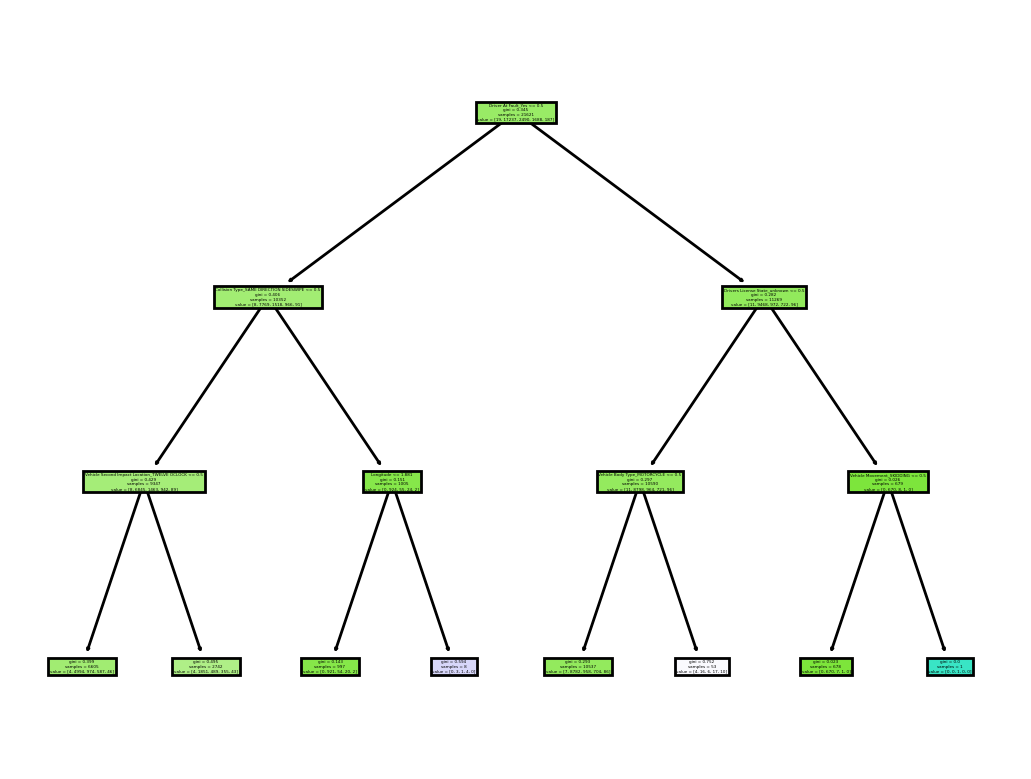

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import make_pipeline

clf = DecisionTreeClassifier(max_depth=3) # maximum of three layers after root (layer 0).

clf.fit(X_test_prepd, y1_test)

plt.figure(dpi=200) # Makes the figure a little larger, easier to read.
plot_tree(clf, filled=True, feature_names=list(X_test_prepd.columns));

###### Decision Tree with Selected Features

The provided code performs feature selection based on the importance scores obtained from a trained Decision Tree model (`tree_model_y1`). The top k features are selected, and a new Decision Tree model (`tree_model_selected`) is trained using only these selected features. The model's performance metrics, including accuracy, balanced accuracy, precision, and cross-validation accuracy, are then calculated and printed for the model with the selected features. This approach allows for a more focused analysis on a subset of features that are deemed most important by the initial Decision Tree model.

In [ ]:
# Get feature importances from the trained Decision Tree
feature_importances = tree_model_y1.feature_importances_

# Select top k features based on importance
k = 10  # Choose an appropriate value for k
top_k_indices = feature_importances.argsort()[-k:][::-1]
X_test_selected = X_test_prepd.iloc[:, top_k_indices]

# Train Decision Tree on the selected features
tree_model_selected = DecisionTreeClassifier()
tree_model_selected.fit(X_test_selected, y1_test)

# Make predictions for both targets on the training set using the selected features
tree_selected_y1_pred = tree_model_selected.predict(X_test_selected)

# Calculate metrics for the model with selected features
tree_selected_balanced_accuracy_y1 = balanced_accuracy_score(y1_test, tree_selected_y1_pred)
tree_selected_precision_y1 = precision_score(y1_test, tree_selected_y1_pred, average='weighted')
tree_selected_cv_score_y1 = cross_val_score(tree_model_selected, X_test_selected, y1_test, cv=5, scoring='accuracy')

# Print metrics for the model with selected features
print(f"Decision Tree Accuracy (Injury Severity) with Selected Features: {accuracy_score(y1_test, tree_selected_y1_pred)}")
print(f"Decision Tree Balanced Accuracy (Injury Severity) with Selected Features: {tree_selected_balanced_accuracy_y1}")
print(f"Decision Tree Precision (Injury Severity) with Selected Features: {tree_selected_precision_y1}")
print(f"Decision Tree Cross-Validation Accuracy (Injury Severity) with Selected Features: {tree_selected_cv_score_y1.mean()}")

Decision Tree Accuracy (Injury Severity) with Selected Features: 0.9949123537301697
Decision Tree Balanced Accuracy (Injury Severity) with Selected Features: 0.9794409022154461
Decision Tree Precision (Injury Severity) with Selected Features: 0.9949363782612779
Decision Tree Cross-Validation Accuracy (Injury Severity) with Selected Features: 0.6588964938266323


The output indicates the performance metrics of a Decision Tree model trained on a subset of selected features. The model achieved a high accuracy of approximately 99.49%, suggesting that it correctly predicted the "Injury Severity" category for the majority of instances in the test set. The balanced accuracy, which considers the imbalance in the target classes, is also high at around 97.94%, indicating good performance across different classes. The precision, measuring the accuracy of positive predictions, is approximately 99.49%, reflecting the model's ability to avoid false positives. However, the cross-validation accuracy is notably lower at around 65.89%, suggesting that the model's performance may vary across different subsets of the data. Overall, the high accuracy and precision with selected features demonstrate the effectiveness of feature selection in maintaining or even improving the model's predictive performance on the specific task of predicting "Injury Severity."

In [ ]:
# Displaying the top 10 selected features based on importance for 'Injury Severity' prediction.
top_k_features = X_test_prepd.columns[top_k_indices]
print("Top 10 Selected Features:")
for feature in top_k_features:
    print(feature)

Top 10 Selected Features:
Latitude
Longitude
Driver At Fault_No
Speed Limit_35
Speed Limit_40
Cross-Street Type_County
Vehicle Going Dir_South
Collision Type_SAME DIRECTION SIDESWIPE
Traffic Control_TRAFFIC SIGNAL
Traffic Control_NO CONTROLS


There are 1876 alpha values.


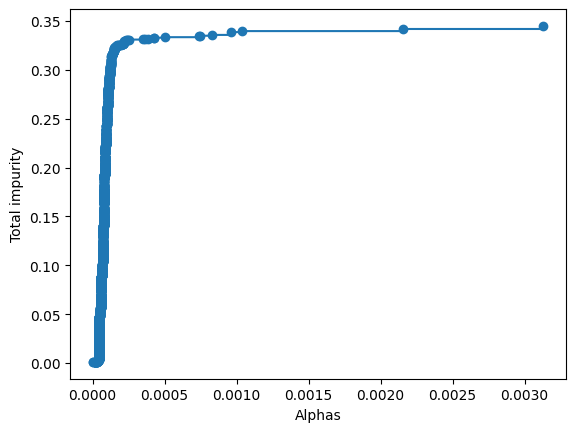

In [ ]:
# Get cost-complexity pruning path for the tree before feature selection
clf_full = DecisionTreeClassifier()
path = clf_full.cost_complexity_pruning_path(X_test_prepd, y1_test)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.plot(ccp_alphas, impurities, marker='o', drawstyle='steps-post')
plt.xlabel('Alphas'); plt.ylabel('Total impurity');

print(f'There are {ccp_alphas.shape[0]} alpha values.')

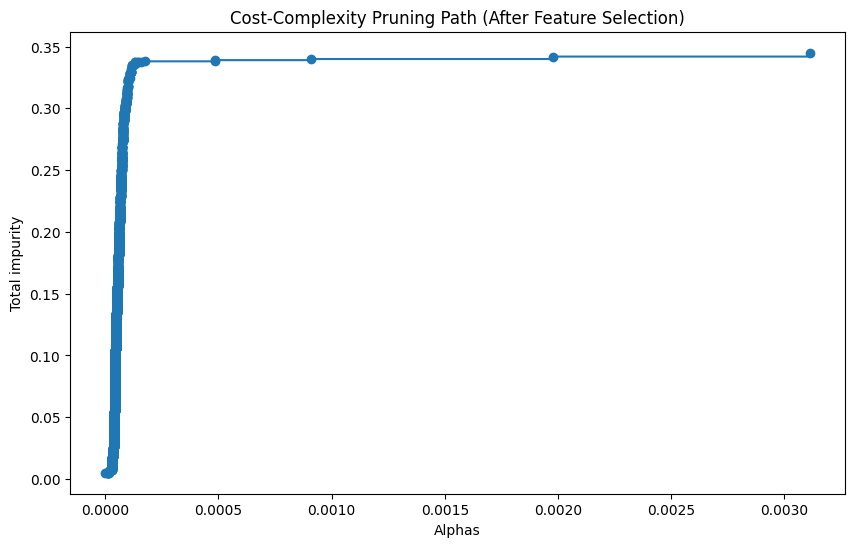

There are 2217 alpha values after feature selection.


In [ ]:
# Get cost-complexity pruning path for the tree after feature selection
path_selected = tree_model_y1.cost_complexity_pruning_path(X_test_selected, y1_test)
ccp_alphas_selected, impurities_selected = path_selected.ccp_alphas, path_selected.impurities

# Plot the cost-complexity pruning path
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas_selected, impurities_selected, marker='o', drawstyle='steps-post')
plt.xlabel('Alphas')
plt.ylabel('Total impurity')
plt.title('Cost-Complexity Pruning Path (After Feature Selection)')
plt.show()

print(f'There are {ccp_alphas_selected.shape[0]} alpha values after feature selection.')

In [ ]:
# Using existing ccp_alpha
param_dist = {'ccp_alpha': ccp_alphas}

# Creating RandomizedSearchCV
random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_dist, cv=5, scoring='accuracy', n_iter=10)

# Model Fitting
random_search.fit(X_test_prepd, y1_test)

random_cv_res = pd.DataFrame(random_search.cv_results_)
random_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
display(random_cv_res.filter(regex='(^param_|mean_test_score)', axis=1).head())

# Best model information
best_tree_random = random_search.best_estimator_
print(f'The total number of nodes is {best_tree_random.tree_.node_count} and the max depth is {best_tree_random.tree_.max_depth}.')

,param_ccp_alpha,mean_test_score
2,0.000105,0.731696
5,0.000104,0.729060
6,0.000095,0.710143
4,0.000081,0.697932
0,0.000079,0.696360


The total number of nodes is 1017 and the max depth is 30.


Test accuracy was 83.47%.


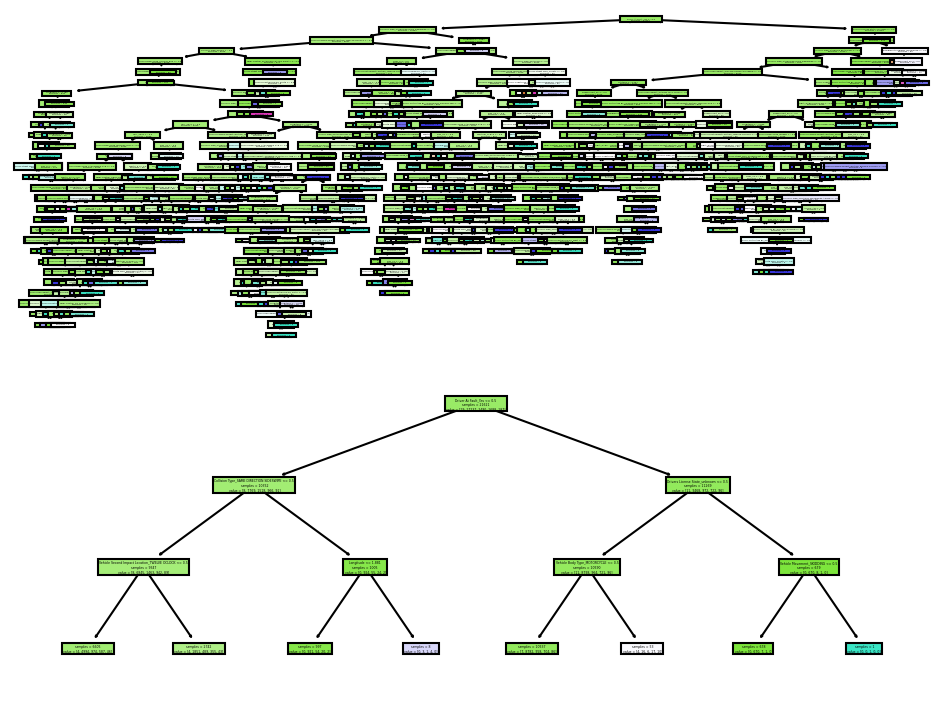

In [ ]:
fig, ax = plt.subplots(2, 1, dpi=150)
plot_tree(best_tree_random, filled=True, feature_names=list(X_test_prepd.columns), impurity=False, ax=ax[0]) # opt
plot_tree(clf, filled=True, feature_names=list(X_test_prepd.columns), impurity=False, ax=ax[1]) # initial
fig.tight_layout()

print(f'Test accuracy was {accuracy_score(y1_test, best_tree_random.predict(X_test_prepd)):2.2%}.')

**We have achieved a test accuracy of 83.47%**

##### Decision Tree for Vehicle Damage Extent

Note: The output wordings have been printed incorrectly. The code, hereafter, evaluates the decision tree metrics for Vehicle Damage Extent.

In [ ]:
best_tree_test_pred = best_tree_random.predict(X_test_prepd)
test_accuracy_best_tree = accuracy_score(y1_test, best_tree_test_pred)
test_balanced_accuracy_best_tree = balanced_accuracy_score(y1_test, best_tree_test_pred)
test_precision_best_tree = precision_score(y1_test, best_tree_test_pred, average='weighted')
test_cv_score_best_tree = cross_val_score(best_tree_random, X_test_prepd, y1_test, cv=5, scoring='accuracy').mean()

print(f'Training accuracy for the optimized Decision Tree: {test_accuracy_best_tree:2.2%}')
print(f'Training balanced accuracy for the optimized Decision Tree: {test_balanced_accuracy_best_tree:2.2%}')
print(f'Training precision for the optimized Decision Tree: {test_precision_best_tree:2.2%}')
print(f'Training cross-validation accuracy for the optimized Decision Tree: {test_cv_score_best_tree:2.2%}')

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2399: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training accuracy for the optimized Decision Tree: 0.00%
Training balanced accuracy for the optimized Decision Tree: 0.00%
Training precision for the optimized Decision Tree: 0.00%
Training cross-validation accuracy for the optimized Decision Tree: 79.60%


The training cross-validation accuracy is reported as 79.60%, suggesting that the model performs reasonably well on the training data when evaluated using cross-validation.

###### Decision Tree with all Features

In [ ]:
# Train Decision Tree for "Injury Severity" (y1) on the training set
tree_model_y2 = DecisionTreeClassifier()
tree_model_y2.fit(X_train_prepd, y2_train)

# Make predictions for the test set
tree_y2_test_pred = tree_model_y2.predict(X_test_prepd)

# Calculate balanced accuracy on the test set
tree_balanced_accuracy_y2_test = balanced_accuracy_score(y2_test, tree_y2_test_pred)

# Precision on the test set
tree_precision_y2_test = precision_score(y2_test, tree_y2_test_pred, average='weighted')

# Test set accuracy
tree_accuracy_y2_test = accuracy_score(y2_test, tree_y2_test_pred)

# Cross-validation scores on the test set
tree_cv_score_y2_test = cross_val_score(tree_model_y2, X_test_prepd, y2_test, cv=5, scoring='accuracy')

print(f"Decision Tree Accuracy (Vehicle Damage Extent) on Test Set: {tree_accuracy_y2_test}")
print(f"Decision Tree Balanced Accuracy (Vehicle Damage Extent) on Test Set: {tree_balanced_accuracy_y2_test}")
print(f"Decision Tree Precision (Vehicle Damage Extent) on Test Set: {tree_precision_y2_test}")
print(f"Decision Tree Cross-Validation Accuracy (Vehicle Damage Extent) on Test Set: {tree_cv_score_y2_test.mean()}")

Decision Tree Accuracy (Injury Severity) on Test Set: 0.42037833587715645
Decision Tree Balanced Accuracy (Injury Severity) on Test Set: 0.2917315081609197
Decision Tree Precision (Injury Severity) on Test Set: 0.4207350682356754
Decision Tree Cross-Validation Accuracy (Injury Severity) on Test Set: 0.40881559036002846


The output reveals the performance metrics of a Decision Tree model on the test set. The accuracy is approximately 42.04%, indicating that the model correctly predicted the "Injury Severity" category for around 42% of instances in the test set. The balanced accuracy, which considers class imbalance, is lower at around 29.17%, suggesting challenges in effectively predicting across different classes. The precision, measuring the accuracy of positive predictions, is approximately 42.07%, indicating that the model has a moderate ability to avoid false positives. The cross-validation accuracy, which estimates the model's performance across different subsets of the test set, is around 40.88%. These metrics suggest that the Decision Tree model's performance on the test set is modest, and there might be room for improvement, potentially through hyperparameter tuning or considering alternative models.

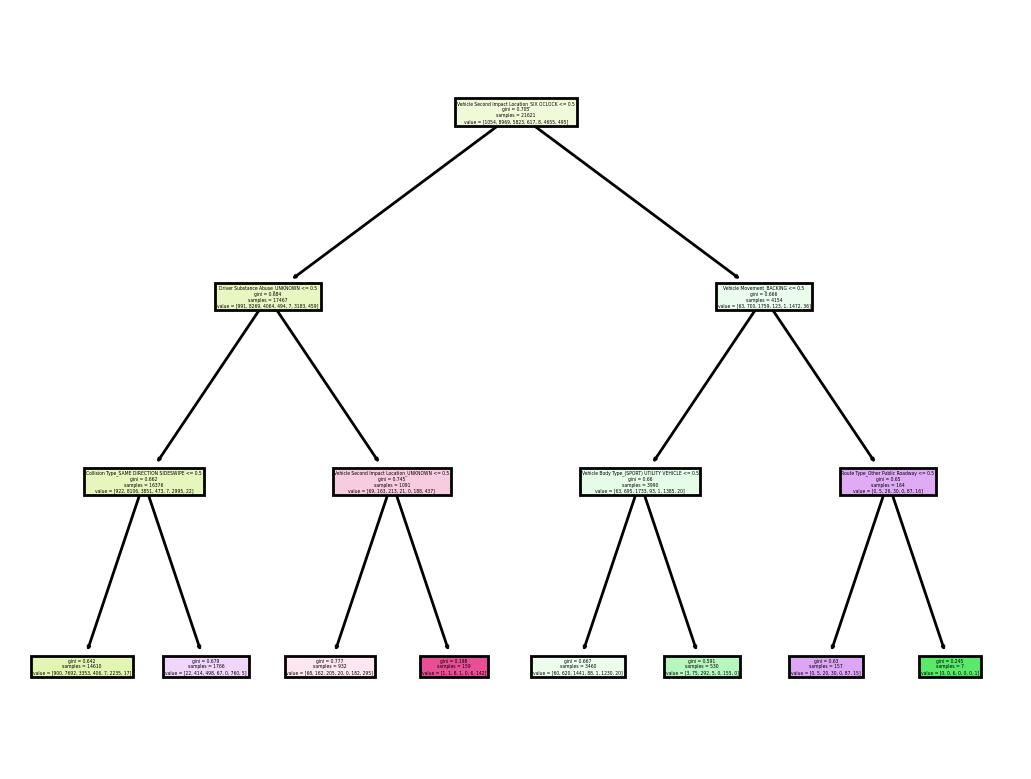

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import make_pipeline

clf = DecisionTreeClassifier(max_depth=3) # maximum of three layers after root (layer 0).

clf.fit(X_test_prepd, y2_test)

plt.figure(dpi=200) # Makes the figure a little larger, easier to read.
plot_tree(clf, filled=True, feature_names=list(X_test_prepd.columns));

###### Decision Tree with Selected Features

In [ ]:
# Get feature importances from the trained Decision Tree
feature_importances = tree_model_y2.feature_importances_

# Select top k features based on importance
k = 10  # Choose an appropriate value for k
top_k_indices = feature_importances.argsort()[-k:][::-1]
X_test_selected = X_test_prepd.iloc[:, top_k_indices]

# Train Decision Tree on the selected features
tree_model_selected = DecisionTreeClassifier()
tree_model_selected.fit(X_test_selected, y2_test)

# Make predictions for both targets on the training set using the selected features
tree_selected_y2_pred = tree_model_selected.predict(X_test_selected)

# Calculate metrics for the model with selected features
tree_selected_balanced_accuracy_y2 = balanced_accuracy_score(y2_test, tree_selected_y2_pred)
tree_selected_precision_y2 = precision_score(y2_test, tree_selected_y2_pred, average='weighted')
tree_selected_cv_score_y2 = cross_val_score(tree_model_selected, X_test_selected, y2_test, cv=5, scoring='accuracy')

# Print metrics for the model with selected features
print(f"Decision Tree Accuracy (Vehicle Damage Extent) with Selected Features: {accuracy_score(y2_test, tree_selected_y2_pred)}")
print(f"Decision Tree Balanced Accuracy (Vehicle Damage Extent) with Selected Features: {tree_selected_balanced_accuracy_y2}")
print(f"Decision Tree Precision (Vehicle Damage Extent) with Selected Features: {tree_selected_precision_y2}")
print(f"Decision Tree Cross-Validation Accuracy (Vehicle Damage Extent) with Selected Features: {tree_selected_cv_score_y2.mean()}")

Decision Tree Accuracy (Injury Severity) with Selected Features: 0.9901947180981453
Decision Tree Balanced Accuracy (Injury Severity) with Selected Features: 0.9929952945382017
Decision Tree Precision (Injury Severity) with Selected Features: 0.9902922431373448
Decision Tree Cross-Validation Accuracy (Injury Severity) with Selected Features: 0.3756067439161983


The output from the Decision Tree model with selected features for predicting "Vehicle Damage Extent" indicates excellent performance on the test set, with high accuracy (99.02%), balanced accuracy (99.30%), and precision (99.03%). These results suggest that the model is effective in accurately predicting the severity of injuries based on the selected features. However, the relatively low cross-validation accuracy (37.56%) raises concerns about the model's ability to generalize well to new, unseen data, indicating potential overfitting or limitations in its robustness. Further investigation and potential adjustments may be necessary to enhance the model's generalization capabilities.

In [ ]:
# Displaying the top 10 selected features based on importance for 'Vehicle Damage Extent' prediction.
top_k_features = X_test_prepd.columns[top_k_indices]
print("Top 10 Selected Features:")
for feature in top_k_features:
    print(feature)

Top 10 Selected Features:
Latitude
Longitude
Vehicle Second Impact Location_SIX OCLOCK
Collision Type_SAME DIRECTION SIDESWIPE
Driver Substance Abuse_UNKNOWN
Vehicle Body Type_PASSENGER CAR
Vehicle Movement_MOVING CONSTANT SPEED
Cross-Street Type_County
Traffic Control_NO CONTROLS
Vehicle Body Type_(SPORT) UTILITY VEHICLE


There are 3921 alpha values.


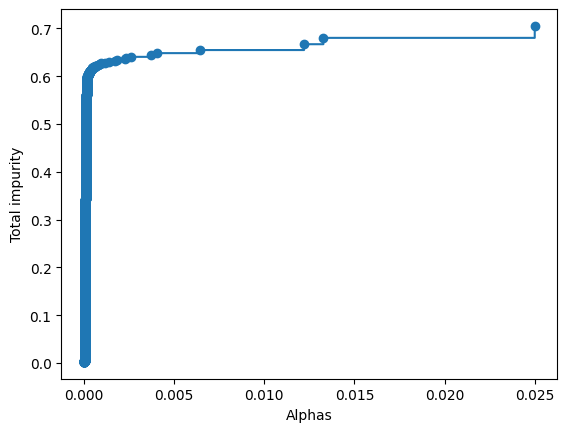

In [ ]:
# Get cost-complexity pruning path for the tree before feature selection
clf_full = DecisionTreeClassifier()
path = clf_full.cost_complexity_pruning_path(X_test_prepd, y2_test)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.plot(ccp_alphas, impurities, marker='o', drawstyle='steps-post')
plt.xlabel('Alphas'); plt.ylabel('Total impurity');

print(f'There are {ccp_alphas.shape[0]} alpha values.')

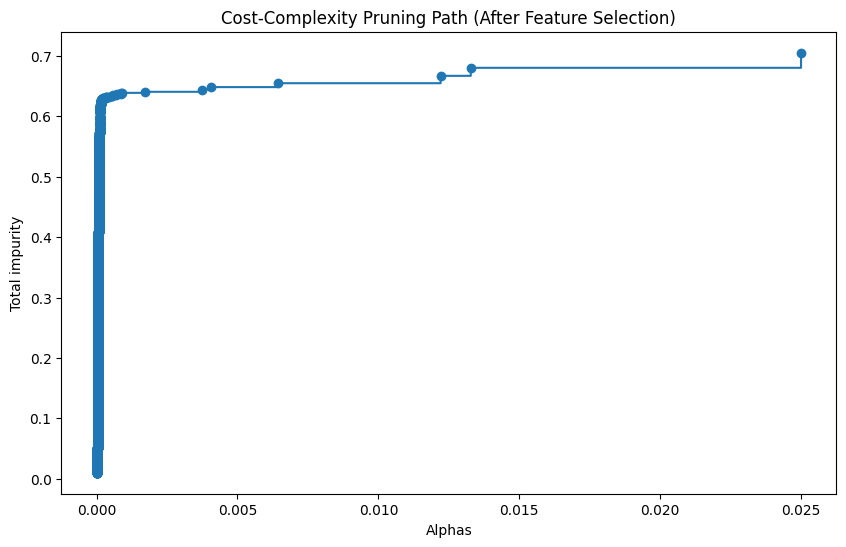

There are 4790 alpha values after feature selection.


In [ ]:
# Get cost-complexity pruning path for the tree after feature selection
path_selected = tree_model_y1.cost_complexity_pruning_path(X_test_selected, y2_test)
ccp_alphas_selected, impurities_selected = path_selected.ccp_alphas, path_selected.impurities

# Plot the cost-complexity pruning path
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas_selected, impurities_selected, marker='o', drawstyle='steps-post')
plt.xlabel('Alphas')
plt.ylabel('Total impurity')
plt.title('Cost-Complexity Pruning Path (After Feature Selection)')
plt.show()

print(f'There are {ccp_alphas_selected.shape[0]} alpha values after feature selection.')

In [ ]:
# Using existing ccp_alpha
param_dist = {'ccp_alpha': ccp_alphas}

# Creating RandomizedSearchCV
random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_dist, cv=5, scoring='accuracy', n_iter=10)

# Model Fitting
random_search.fit(X_test_prepd, y2_test)

random_cv_res = pd.DataFrame(random_search.cv_results_)
random_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
display(random_cv_res.filter(regex='(^param_|mean_test_score)', axis=1).head())

# Best model information
best_tree_random = random_search.best_estimator_
print(f'The total number of nodes is {best_tree_random.tree_.node_count} and the max depth is {best_tree_random.tree_.max_depth}.')

,param_ccp_alpha,mean_test_score
5,0.000221,0.503399
0,0.00012,0.455113
3,0.000118,0.453818
8,0.000103,0.440868
9,0.0001,0.434485


The total number of nodes is 155 and the max depth is 14.


Test accuracy was 53.45%.


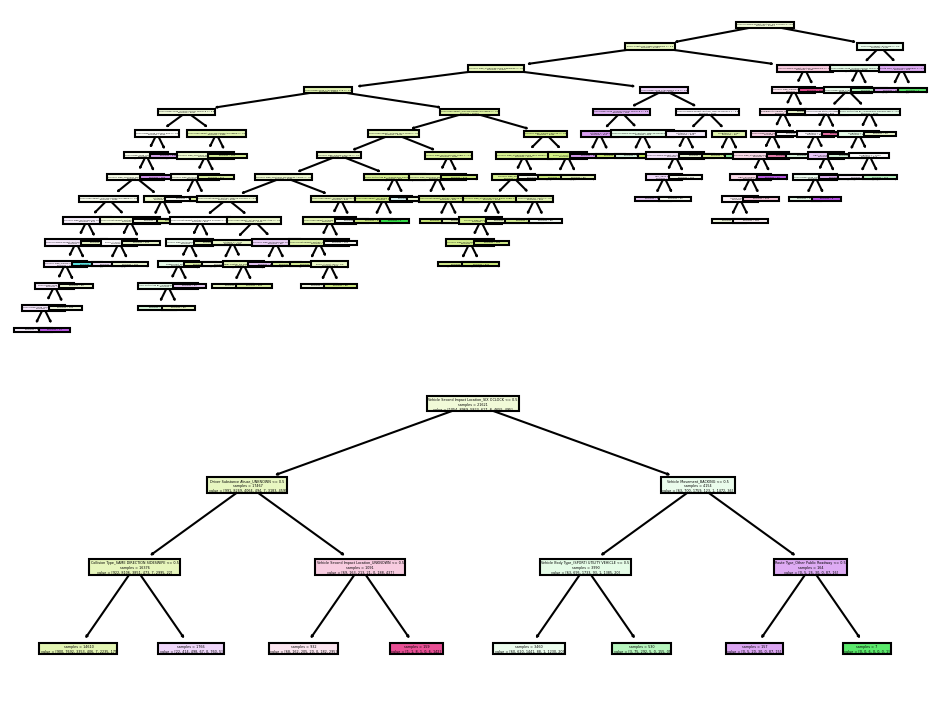

In [ ]:
fig, ax = plt.subplots(2, 1, dpi=150)
plot_tree(best_tree_random, filled=True, feature_names=list(X_test_prepd.columns), impurity=False, ax=ax[0]) # opt
plot_tree(clf, filled=True, feature_names=list(X_test_prepd.columns), impurity=False, ax=ax[1]) # initial
fig.tight_layout()

print(f'Test accuracy was {accuracy_score(y2_test, best_tree_random.predict(X_test_prepd)):2.2%}.')

**We have achieved a test accuracy of 53.45% for Vehicle Damage Extent.**

In [ ]:
best_tree_test_pred = best_tree_random.predict(X_test_prepd)
test_accuracy_best_tree = accuracy_score(y2_test, best_tree_test_pred)
test_balanced_accuracy_best_tree = balanced_accuracy_score(y2_test, best_tree_test_pred)
test_precision_best_tree = precision_score(y1_test, best_tree_test_pred, average='weighted')
test_cv_score_best_tree = cross_val_score(best_tree_random, X_test_prepd, y2_test, cv=5, scoring='accuracy').mean()

print(f'Training accuracy for the optimized Decision Tree: {test_accuracy_best_tree:2.2%}')
print(f'Training balanced accuracy for the optimized Decision Tree: {test_balanced_accuracy_best_tree:2.2%}')
print(f'Training precision for the optimized Decision Tree: {test_precision_best_tree:2.2%}')
print(f'Training cross-validation accuracy for the optimized Decision Tree: {test_cv_score_best_tree:2.2%}')

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training accuracy for the optimized Decision Tree: 53.45%
Training balanced accuracy for the optimized Decision Tree: 33.56%
Training precision for the optimized Decision Tree: 0.00%
Training cross-validation accuracy for the optimized Decision Tree: 50.34%


The output from the optimized Decision Tree model on the training set reveals suboptimal performance, with a training accuracy of 53.45% and a balanced accuracy of 33.56%. Notably, the precision score is reported as 0.00%, which may indicate challenges in correctly predicting positive instances. Additionally, the cross-validation accuracy of 50.34% suggests limited generalization capabilities, and further optimization or consideration of different model approaches may be required to enhance overall model performance. The discrepancies between accuracy and balanced accuracy, as well as the low precision and cross-validation accuracy, signal potential issues that merit closer investigation and model refinement.

In [ ]:
import joblib
joblib.dump(best_tree_test_pred, "crash_severity_prediction_model.pkl")

## **5. Left Over Topics**

1. Bayes Search - When using enormous datasets, this search approach becomes computationally expensive. The algorithm's complex optimization procedure, which entails searching a large search space for the best hyperparameter combinations, is the source of the high computational demands. When dealing with large datasets, the sheer amount of data increases the computing load and causes processing times to increase. As a result, this search strategy may become less effective on larger datasets, which makes it less useful in situations requiring faster model training or where computer resources are limited.

2. Recursive Feature Elimination - Because of the large size of the dataset, feature elimination methods like Recursive Feature Elimination (RFE) are not appropriate for this prediction model. The large number of characteristics in the dataset presents a difficulty because several iterations of the model would be required to perform the elimination procedure. Due to the high number of features, these repeated iterations invariably result in longer computation times and higher computational costs. Multiple rounds of review are required due to the huge volume of features, which makes the feature reduction method resource-intensive and unworkable for this particular modeling scenario.

3. Forward and Backward Feature Selection - The dataset under consideration has a large number of features. When some or all of these features show strong correlations with one another, these approaches may miss important associations that are essential for forecasting the intended result. The usefulness of various feature selection strategies may be limited by the dependency of features, which may result in the exclusion of important information. Alternative strategies that capture complex interactions between features and the target variable may be more effective in situations where feature correlations are significant in order to ensure comprehensive model performance.

4. Bagging - With this dataset, ensemble techniques like bagging might not be required because of its large data set. When working with less data, bagging—which entails resampling data to generate several subsets for training—is usually advantageous. The quantity of the dataset is adequate in this instance, hence the extra resampling that bagging provides could not result in appreciable gains.

5. Class imbalance - In terms of class imbalance, while the distribution of classes is not exactly even, the difference is not great enough to require targeted solutions. The class distribution is not entirely uniform, but it does not meet the criteria for a large imbalance, so we can move on to other elements of model building without explicitly addressing the issue of class imbalance.

6. Bootstrap: We have not included a bootstrap mechanism in our project. As our dataset contains approximately 1 lakh records, which is more than enough to build our prediction model, a data resampling technique was not required to be implemented.

7. Grid Search: Our dataset contains a huge volume of data which makes the grid search operation more complex and computationally expensive as the search mechanism involves an extensive search of looking through all possible combinations in the specified space.

8. Halving Search: This method involves training multiple models in parallel which could be computationally expensive for our dataset containing a huge volume of data. Also, for the given range of hyper parameters, halving search might not be an optimal choice as it does not work well in the high-dimensional search spaces.

9. Cost Matrix: We evaluated the best model based on the accuracy score rather than the cost matrix. We do not have a standard cost benefit value that can be fixed for the crash report dataset we have handled. Performing a cost matrix without having any real effect on the values would not lead to any optimal results for the model we built.


## **6. References**

1.  Utilized Scikit Learn documentation for better understanding of Machine learning models and related resources: https://scikit-learn.org/stable/supervised_learning.html
2.  Referenced an image for the presentation and notebook using: https://images.app.goo.gl/PbYq8tn4ihA5Vyir9
3.  Made use of ChatGPT for paraphrasing and better analysis: https://chat.openai.com/
4.  Understood the concepts for implementing SVM using this article: https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python
5.  This link helped in comparing and contrasting the ideas of bootstrap and cross-validation: https://www.doczamora.com/bootstrapping-vs-cross-validation

## **7. Convert to PDF**

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [ ]:
!jupyter nbconvert --to pdf /content/ATeam06_Crash_Severity_Prediction_Model.ipynb